In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import math

import plotly.express as px

import pandas_datareader.data as web

from keras.callbacks import EarlyStopping

import keras
from keras.models import load_model
from keras.preprocessing.sequence import TimeseriesGenerator
#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.metrics import mean_squared_error

## Introduction
Technical analysis is a trading discipline used to evaluate investments and identify trading opportunities in price trends and patterns from graphs.  Technical analysts believe past trading activity and price changes of a stock can be indicators of the security's future price movements.  The difference between 
technical analysis and fundamental analysis is that fundamental analysts focuses on a company's financials rather than historical price patterns or stock trends.  https://www.investopedia.com/terms/t/technicalanalysis.asp<br>
This notebook will demonstrate how to perform a very basic technical analysis of stock prices using Python code.  I will provide analysis and insights of stock prices that can be obtained from historical stock data and corresponding graphs.  In addition, this notebook will demonstrate how algorithmic trading can be used to predict stock prices and how technical indicators can used with LTSM models.<br>
I obtained the historical stock data by using the Pandas library DataReader.  The library provides price and volume information regarding stocks. I will use mainly the Adjusted Closing Price ('Adj Close') from the datasets.<br>
In addition, I will use the Long Short Term Memory (LSTM ) and SARIMA models to forecast the next day stock price.  I will use  metrics to measure the performance of the models at predicting stock prices.  
The data will consist of the following pharmaceutical companies that are developing a COVID-19 vaccine: 
* Pfizer (PFE),
* Johnson & Johnson (JNJ)
* Moderna (MRNA)
* Novavax (NVAX) 
* BioNTech SE (BNTX)
* MERCK & Co. (MRK)

What is a technical Indicators?  Technical indicators are heuristic or mathematical calculations based on the price, volume, or open interest of a security or contract used by traders who follow technical analysis. https://www.investopedia.com/terms/t/technicalindicator.asp Technical indicators are signals produced from the patterns observed in the movements of stock prices (high, low, open, close) and volumes. And these signals are in turn used to predict the future price movements. Techincal Indicators as used in this notebook will provide historical price analysis  regarding volatility and trends of the stock.Technical indicators are a fundamental part of technical analysis and are typically plotted as a chart pattern to try to predict the market trend.<br>
Some basic examples of technical indicators which I will cover are:
1. Simple Moving Averages (SMA)
2. Weighted Moving Averages (WMA)
3. Exponential Moving Averages (EMA)
4. Moving Average Convergence Divergence (MACD)

My technical analysis will focus on answering the following questions  which include the creation algorithmic models trends  and graphs to show the performance of the above stocks andregarding:
### Question 1: 
Can technical indicators alone provide an investor or trader with information to make a decision of when to buy and sell stocks?<br>
**Answer**: Yes. 
Investment decisions are very complicted and require knowledge and consideration of many variables which are beyond the scope of this notebook.  However, technical indicators are tools used by investors and traders to gain insights regarding the stock's history, volatility, trends and the direction the price may be headed.    I will use Moving Averages, prices changes and MACD to analyze price trends.  A question to always consider is what type of investment is being sought?  Are you looking for short investments with high returns or long term investment with consistent returns.<br>
<br>
**Model 1** A Simple Moving Average Plot with a rolling average of 10 and 50 days.<br> 
**Model 2** An Exponential Moving Average Plot.<br>
**Model 3** Exponential Moving Average Crossover Stratergy

### Question 2:
How well can historical data  and algorithms predict future stocks prices?  I will contrast the performance of predictions of LSTM models and LTSM models with technical indicators.  Is there a difference in the RMSE metrics when comparing models?<br>
**Model 1** I will use a LTSM Neural Network to make a price prediction with only historical price data.<br>
**Model 2** LTSM model with technical indicators to predict and graph future stock prices.<br>
### Question 3:
Which trading algorithms LTSM or ARIMA performs better at predicting stocks prices?  
**Model 1** is an SARIMA model.<br>


## Historical Stock Data

### Multiple Stocks Data (multi_stocks)

In [307]:
from datetime import date
today = date.today()
def multiple_stock_data(ticker=None, start=None, end=None, plot=True, stock_value=None):
    
    try:
        #stock = pdr.get_data_yahoo(ticker,start,end)
        data = {}
        for stock in ticker:
            data = web.DataReader(stock,'yahoo',start,end)[stock_value]
        df_1 = pd.DataFrame(data)#.reset_index()
        if plot==True:
            df_1.plot(figsize=(12,8))
            plt.title("HistoricL Stock Adjusted Price Data")
            plt.xlabel('Dates')
            plt.ylabel('Stock Prices')
            plt.legend(bbox_to_anchor=(1.05,1),loc='upper left') 
        
        return df_1
     
    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'


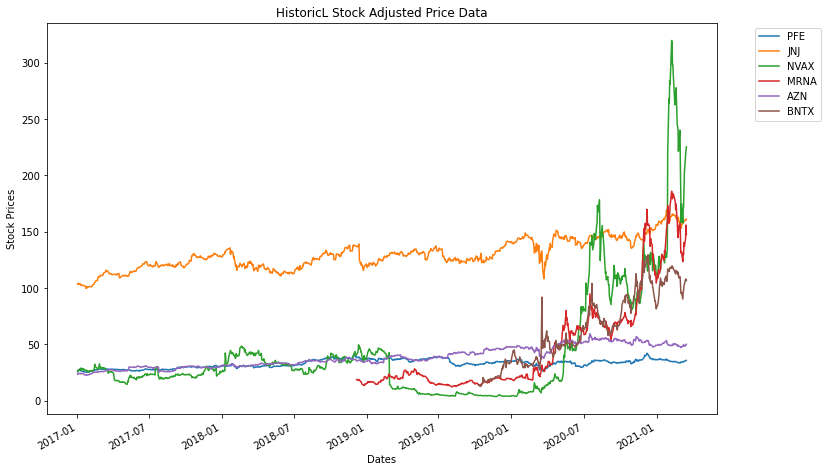

In [308]:
multi_stock_data = multiple_stock_data(ticker=[['PFE','JNJ','NVAX','MRNA','AZN','BNTX']], start='2017',end='today',plot=True, stock_value='Adj Close')
multi_stock_data;

In [309]:
multi_stock_data.to_csv('multi_pharm_data')

In [310]:
#start='2017',end='today'
multi_stocks = pd.read_csv('multi_pharm_data', parse_dates=True, index_col='Date')
multi_stocks

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
Date,,,,,,
2017-01-03,26.653324,103.436539,25.400000,NaN,23.433638,NaN
2017-01-04,26.887548,103.266876,26.200001,NaN,23.619688,NaN
2017-01-05,27.146002,104.347321,26.400000,NaN,24.262403,NaN
2017-01-06,27.041008,103.847282,27.400000,NaN,24.042524,NaN
2017-01-09,27.032928,103.829422,28.400000,NaN,24.127094,NaN
...,...,...,...,...,...,...
2021-03-11,34.709999,159.139999,187.630005,140.470001,48.669998,102.599998
2021-03-12,34.939999,159.600006,202.770004,136.990005,48.419998,103.279999
2021-03-15,35.410000,160.419998,217.460007,143.660004,48.770000,107.879997


#### Multiple Stock Plot

In [311]:
def multi_plot(df, stock_value=None):
    #plt.figure(figsize=(12,8))
    df.plot(figsize=(12,8))
    label_font = {'weight':'bold','size':18}
    plt.xlabel('Date',fontdict=label_font)
    plt.ylabel(f'{stock_value} Price USD ($)',fontdict=label_font)
    plt.title(f'Historical {stock_value} Price',fontdict=label_font)
            #plot = go.Scatter(x=df_single.index, y=df_single['Adj Close'])
            
    #return df    

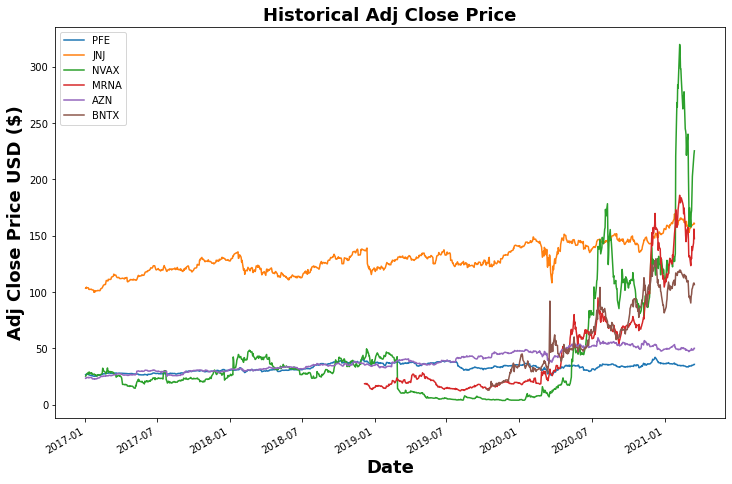

In [312]:
multi_plot(multi_stocks, stock_value='Adj Close')

In [313]:
multi_stocks.describe()

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
count,1058.000000,1058.000000,1058.000000,572.000000,1058.000000,361.000000
mean,32.877767,129.715948,42.972259,49.202124,38.594281,64.199584
std,3.682662,13.473551,50.460777,43.984305,9.148631,31.564797
min,25.159119,99.793396,3.690000,12.260000,22.596422,12.750000
25%,30.063034,120.262554,12.635000,17.810000,30.820116,36.540001
50%,33.124252,128.217926,27.000000,23.675000,36.387133,61.200001
75%,36.073600,139.404289,42.599998,69.097502,47.149688,90.379997
max,42.101986,169.423508,319.929993,185.979996,59.466022,129.539993


### Single Stock Data (pfe_stock_data)

In [314]:
def single_stock_data(symbol, start,end=None,plot=True,stock_value='Adj Close'):
    
    try:
        
        df = web.DataReader(symbol,'yahoo', start, end)
        df_single = pd.DataFrame(df)
        print("Dataframe has {} rows and {} columns".format(df_single.shape[0],df_single.shape[1]))
        print()
        if plot==True:
            plt.figure(figsize=(12,8))
            plt.plot(df_single[stock_value])
            label_font = {'weight':'bold','size':18}
            plt.xlabel('Date',fontdict=label_font)
            plt.ylabel('Close Price USD ($)',fontdict=label_font)
            plt.title(f'Historical {stock_value} Price for {symbol}',fontdict=label_font)
            #plot = go.Scatter(x=df_single.index, y=df_single['Adj Close'])
            
        return df_single
        
    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'


This is data for Pfizer.

Dataframe has 1058 rows and 6 columns



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,31.309298,30.920303,31.024668,31.309298,23391844.0,26.653324
2017-01-04,31.641365,31.337761,31.432638,31.584440,22753963.0,26.887548
2017-01-05,31.963947,31.423149,31.660341,31.888046,21083584.0,27.146002
2017-01-06,31.973434,31.631880,31.935484,31.764706,18418228.0,27.041008
2017-01-09,31.944971,31.669828,31.717268,31.755219,21559886.0,27.032928
...,...,...,...,...,...,...
2021-03-11,35.119999,34.660000,35.070000,34.709999,24511100.0,34.709999
2021-03-12,34.980000,34.509998,34.560001,34.939999,16328500.0,34.939999
2021-03-15,35.430000,34.959999,35.009998,35.410000,21896100.0,35.410000


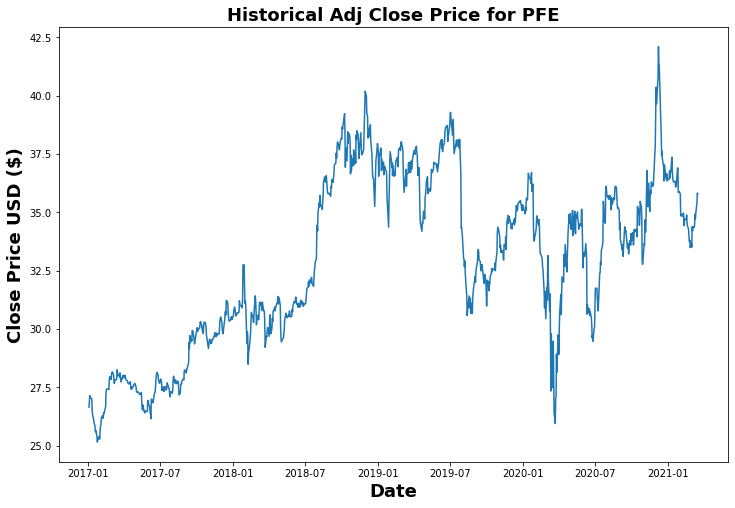

In [315]:
start='01-01-2019'
end='today'
pfe_stock = single_stock_data('PFE', start='01-01-2017',end='today',plot=True,stock_value='Adj Close')
pfe_stock

In [316]:
pfe_stock.to_csv('pfe_stock')
pfe_stock_df = pd.read_csv('pfe_stock', parse_dates=True, index_col='Date')
#single_stock['Close']['2015-04-01':'2015-12-01'].plot()
pfe_stock_data = pfe_stock_df[['Close','Volume','Adj Close']]

In [317]:
pfe_stock_data.describe()

,Close,Volume,Adj Close
count,1058.000000,1.058000e+03,1058.000000
mean,35.578197,2.604793e+07,32.877767
std,3.297115,1.371213e+07,3.682662
min,27.030361,5.187683e+06,25.159119
25%,33.410815,1.812089e+07,30.063034
50%,34.814989,2.272730e+07,33.124252
75%,37.777413,2.955548e+07,36.073600
max,43.861481,2.301539e+08,42.101986


#### Single Stock Plot

In [318]:
def single_plot(df,stock_value=None, stock_symbol=None):
    #plt.figure(figsize=(12,8))
    df[stock_value].plot(figsize=(12,8))
    label_font = {'weight':'bold','size':18}
    plt.xlabel('Date',fontdict=label_font)
    plt.ylabel(f'{stock_value} Price USD ($)',fontdict=label_font)
    plt.title(f'{stock_symbol} {stock_value} Data',fontdict=label_font)
            #plot = go.Scatter(x=df_single.index, y=df_single['Adj Close'])
                

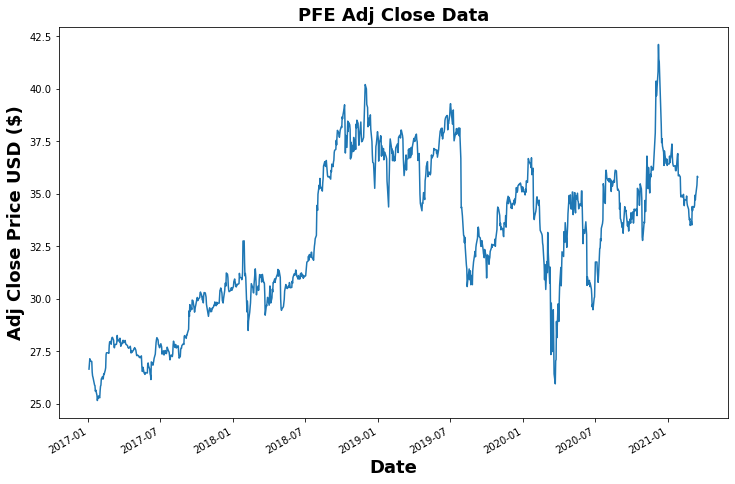

In [319]:
single_plot(pfe_stock_data, stock_value='Adj Close', stock_symbol='PFE')

In [320]:
pfe_stock_data['Adj Close'].describe()

count    1058.000000
mean       32.877767
std         3.682662
min        25.159119
25%        30.063034
50%        33.124252
75%        36.073600
max        42.101986
Name: Adj Close, dtype: float64

## Technical Indicators
The practice of analyzing and executing stock trades is becoming increasingly automated with algorithimic trading.  The usage of technnical indicators is part of algorithmic trading. What are technical indicators and how are they used by Technical Analyst in stock trading?  Technical indicators are approaches or pattern-based signals produced by the price, volume, and/or open interest of a stock which are used by traders who follow technical analysis.  Technical analysts believe past trading activity and price changes of a security can be valuable indicators of the security's future price movements. https://www.investopedia.com/terms/t/technicalindicator.asp<br>Technical analysts look for indicators in the historical data and use them to predict future price movements.  The analysts also use them to look for entry and exit points in markets to conduct trades.  I will discuss the below popular technical indicators which are used in the markets to study price movements:

1. Moving Averages (MA)
    > Simple Moving Average<br>
    > Exponential Moving Average<br>
2. Rate of Change (ROC)
3. Relative Strength Index (RSI)

### Moving Averages
The moving average is also known as the rolling mean or running average.  Moving averages smooth out the curve by filtering out the noise inorder to highlight components in the data such as trends and seasonality.  The moving Average smooths out the variations in the dataset by calculating the moving average.  Three common types of moving averages are Simple Moving Average (SMA), Weighted Moving Average (WMA) and Exponential Moving Average (EMA).  Common time periods used for moving averages are 5, 10, 20, 50, 200 days.  A 10 time period SMA would mean 10 trading days.<br>

#### Simple Moving Average
The Simple Moving Average is the arithmetic mean of all the stock prices or the sum of all the stock prices divided by the number of periods.  We can use the Python rolling method to calculate moving averages.  SMA calculates the average of prices over a given interval of time and is used to determine the trend of the stock. <br>  
The below graph looks like the stock price is volatile with lots of fluctuations and noise.  The plot shows the average stock price with the 10 and 50-day moving averages.  The 10-day follows the Adj Close price but smooths out the positve and negative spikes in prices.<br>
Aound 2/18, there was a spike in price from \\$35.00 to almost \\$37.50 and then dropped quickly to almost \\$32.00.  What is the SMA showing us?  SMA gives a more realistic picture of what happened with stock the price. The price increased and dropped precipitously.  We may not know what precipitated such activity, but what were the 10 and 50 day averages around this time period for a more accurate picture of what the stock price was for that period?  How does this compare to performance of the stock in general?  The average price of the stock was \\$35.578.  When applying the 10 and 50-day Moving Averages the average price is still \\$35.00.  So is the stock price really that volatile? <br>  <br>What's interesting is that if we do subsets of for time period of 2/18 to for 10 and 50 averages we see that the average price was still around \\$35.00.<br>  We can see that with the subset of 50 day rolling average data the stock's average price was \\$30.26.
Around 8/2019, the price was pretty volatile.  The SMA smooths out the noise and gives a more accurate picture.<br>

In [321]:
rolling_method = pd.read_csv('pfe_stock', parse_dates=True, index_col='Date')

In [322]:
#how big should the subset of data be that we're calculating the moving average on?
def sma(data, col1=None,col2=None,col=None,roll1=None,roll2=None):
    data[col1] = data[col].rolling(10).mean()
    data[col2] = data[col].rolling(50).mean()

    return data#['2017-01-01':'2021-2-19']

##### Qestion 1 / Model 1

In [323]:
sma_rolling = sma(rolling_method, col='Close',col1='MA_10',col2='MA_50',roll1=10,roll2=50)
sma_rolling

,High,Low,Open,Close,Volume,Adj Close,MA_10,MA_50
Date,,,,,,,,
2017-01-03,31.309298,30.920303,31.024668,31.309298,23391844.0,26.653324,NaN,NaN
2017-01-04,31.641365,31.337761,31.432638,31.584440,22753963.0,26.887548,NaN,NaN
2017-01-05,31.963947,31.423149,31.660341,31.888046,21083584.0,27.146002,NaN,NaN
2017-01-06,31.973434,31.631880,31.935484,31.764706,18418228.0,27.041008,NaN,NaN
2017-01-09,31.944971,31.669828,31.717268,31.755219,21559886.0,27.032928,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-03-11,35.119999,34.660000,35.070000,34.709999,24511100.0,34.709999,34.211000,35.5064
2021-03-12,34.980000,34.509998,34.560001,34.939999,16328500.0,34.939999,34.355999,35.4642
2021-03-15,35.430000,34.959999,35.009998,35.410000,21896100.0,35.410000,34.527999,35.4376


In [324]:
print('Close Price')
print(sma_rolling['Close'].describe())
print()
print('10 Day Moving Average')
print(sma_rolling['MA_10'].describe())
print()
print('50 Day Moving Average')
print(sma_rolling['MA_50'].describe())

Close Price
count    1058.000000
mean       35.578197
std         3.297115
min        27.030361
25%        33.410815
50%        34.814989
75%        37.777413
max        43.861481
Name: Close, dtype: float64

10 Day Moving Average
count    1049.000000
mean       35.596878
std         3.238781
min        28.910816
25%        33.529412
50%        34.770399
75%        38.018975
max        42.622391
Name: MA_10, dtype: float64

50 Day Moving Average
count    1009.000000
mean       35.709007
std         2.971890
min        31.284440
25%        33.899051
50%        34.812334
75%        37.696016
max        41.757495
Name: MA_50, dtype: float64


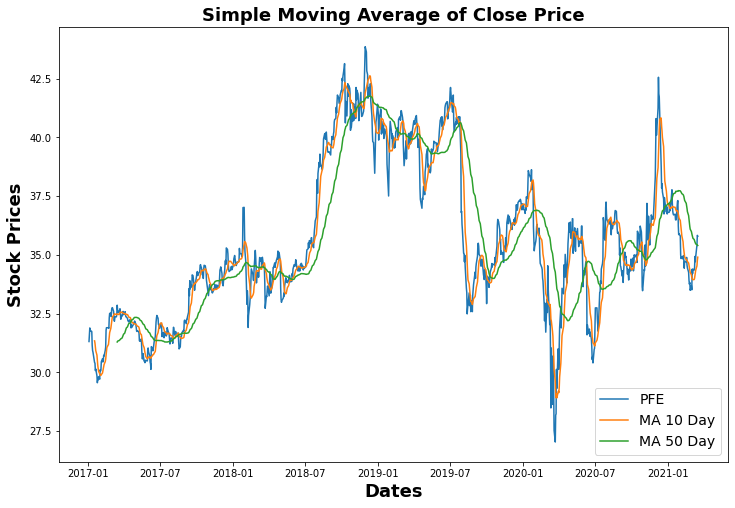

In [325]:
plt.figure(figsize=(12,8))
plt.plot(sma_rolling['Close'], label='PFE')
plt.plot(sma_rolling['MA_10'], label='MA 10 Day')
plt.plot(sma_rolling['MA_50'],label='MA 50 Day')
label_font = {'weight':'bold','size':18}
plt.title('Simple Moving Average of Close Price',fontdict=label_font)
plt.xlabel('Dates',fontdict=label_font)
plt.ylabel('Stock Prices',fontdict=label_font)
plt.legend(loc='lower right', fontsize=14);

In [326]:
rolling_50_sub = rolling_method['MA_50']['2017-12-01':'2018-3-01']
rolling_50_sub.describe()

count    61.000000
mean     34.270483
std       0.260858
min      33.929412
25%      34.036243
50%      34.222391
75%      34.522391
max      34.675522
Name: MA_50, dtype: float64

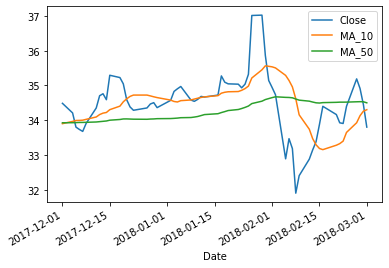

In [327]:
sma_rolling[['Close','MA_10','MA_50']]['2017-12-01':'2018-3-01'].plot()

##### Moving Average Convergence/Divergence
The 50-day moving average is the one that takes longer to adjust to sudden price changes, while the 10-day one is much faster to account for sudden changes.
The logic of the strategy is as follows:
when the fast MA crosses the slow one upwards, we buy the asset
when the slow MA crosses the fast one upwards, we sell the asset

In [328]:
sma_rolling_1 = sma_rolling.copy()

In [329]:
sma_rolling_1['Signal'] = 0.0
sma_rolling_1['Signal'] = np.where(sma_rolling_1['MA_10'] > sma_rolling_1['MA_50'], 1.0, 0.0)
sma_rolling_1['Position'] = sma_rolling_1['Signal'].diff()

In [330]:
sma_rolling_1 = sma_rolling_1.dropna()

In [331]:
sma_rolling_1.head()

,High,Low,Open,Close,Volume,Adj Close,MA_10,MA_50,Signal,Position
Date,,,,,,,,,,
2017-03-15,32.922199,32.428844,32.466793,32.855785,24279839.0,28.254789,32.485769,31.289754,1.0,1.0
2017-03-16,32.855785,32.495255,32.798862,32.666035,21816219.0,28.091606,32.478179,31.316888,1.0,0.0
2017-03-17,32.808350,32.514233,32.694496,32.561668,45736117.0,28.001856,32.459203,31.336433,1.0,0.0
2017-03-20,32.732449,32.561668,32.637569,32.618595,18435514.0,28.050808,32.462049,31.351044,1.0,0.0
2017-03-21,32.836811,32.428844,32.713470,32.495255,33083479.0,27.944742,32.486717,31.365655,1.0,0.0


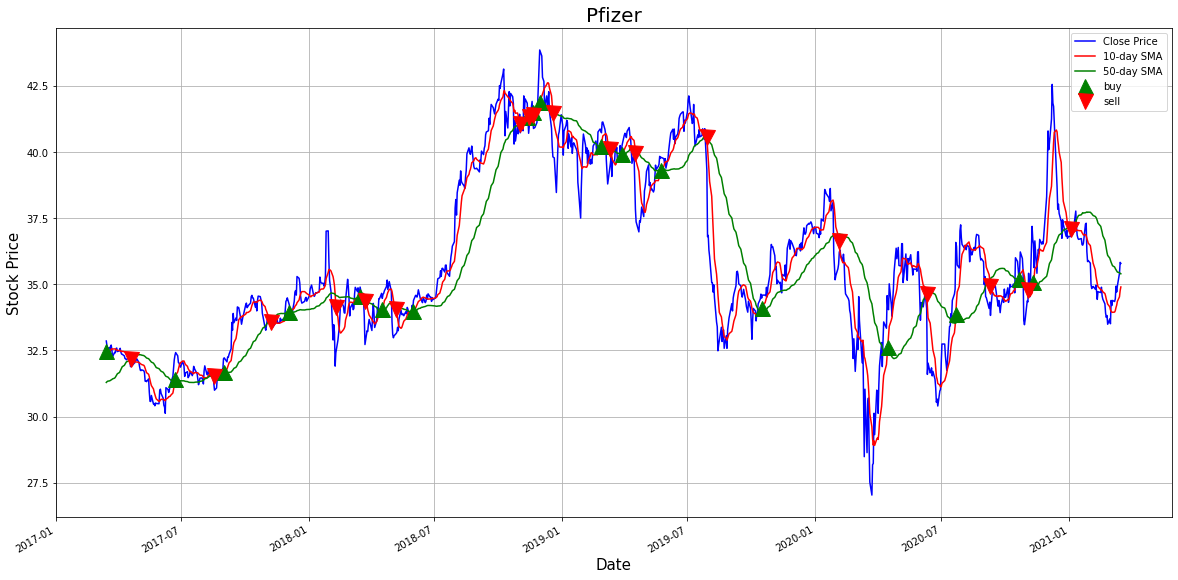

In [332]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
sma_rolling_1['Close'].plot(color = 'b', label= 'Close Price') 
sma_rolling_1['MA_10'].plot(color = 'r',label = '10-day SMA') 
sma_rolling_1['MA_50'].plot(color = 'g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(sma_rolling_1[sma_rolling_1['Position'] == 1].index, 
         sma_rolling_1['MA_10'][sma_rolling_1['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(sma_rolling_1[sma_rolling_1['Position'] == -1].index, 
         sma_rolling_1['MA_10'][sma_rolling_1['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Stock Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Pfizer', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [333]:
sma_rolling_2 = sma_rolling_1['2018-01-01':'2018-07-01']

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



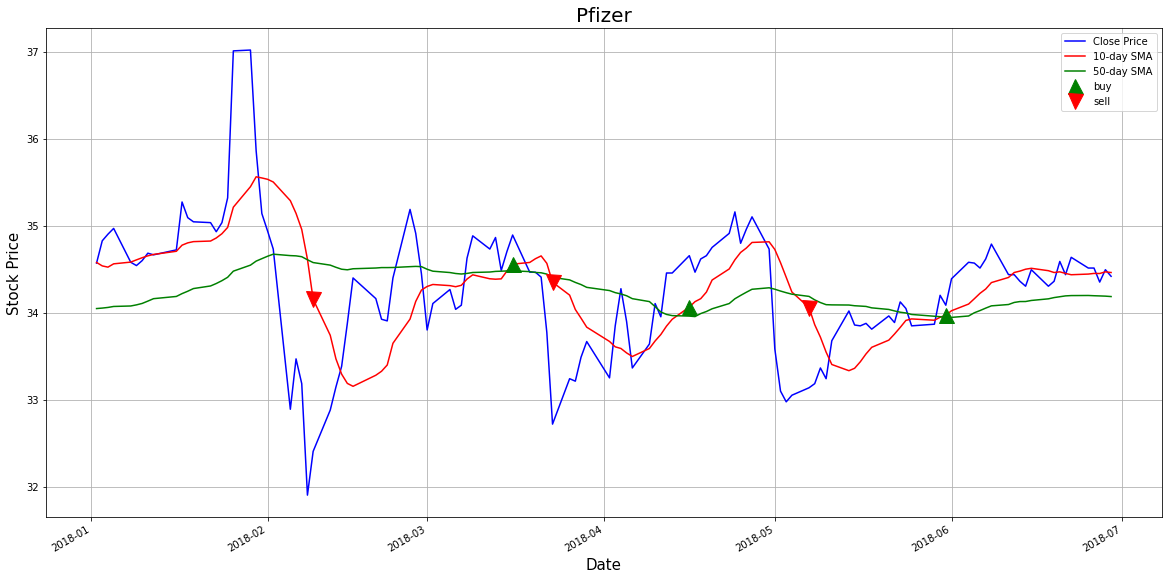

In [334]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
sma_rolling_2['Close'].plot(color = 'b', label= 'Close Price') 
sma_rolling_2['MA_10'].plot(color = 'r',label = '10-day SMA') 
sma_rolling_2['MA_50'].plot(color = 'g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(sma_rolling_2[sma_rolling_1['Position'] == 1].index, 
         sma_rolling_2['MA_10'][sma_rolling_1['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(sma_rolling_2[sma_rolling_2['Position'] == -1].index, 
         sma_rolling_2['MA_10'][sma_rolling_2['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Stock Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Pfizer', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

#### Exponential Moving Average (EMA)
 The EMA is also referred to as the exponentially weighted moving average.  The difference between EMA and SMA is that SMA assigns equal weight to all periods.  Whereas, with EMA the latest prices are given higher weights and it assigns lesser weight to past data.  EMA is used more by short term traders because it is quicker to react to price changes compared to SMA which is slower. This technical indicator is used to produce buy and sell signals based on crossovers and divergences from the historical price average.  https://www.investopedia.com/terms/e/ema.asp
 <br>
When red line crosses above the green line you see a increase in the price and every time the red drops below the EMA26 you see the price decrease.<br>
MACD cross over strategy 
technical indicator that uses the difference between exponentil moving averages to determine the momentun and 
direction of the market.
When MACD line cross ablve the signal line that indicates a good time to buy and when it is below signal line that 
indcates a time to sell
MACD line is calculated by taking teh short term exponenrial moving average -long term exponetial moving average
Usually short term lasts 12 periods, long term lasts 26 periods
Signal line is usually a 9 period exponentially smooth average of the MACD line 
This program uses the Moving Average Convergence/Divergence Crossover to determine when to buy and sell stock
MACD line and signal line to determine when to buy and sell stock

#### MACD Crossover

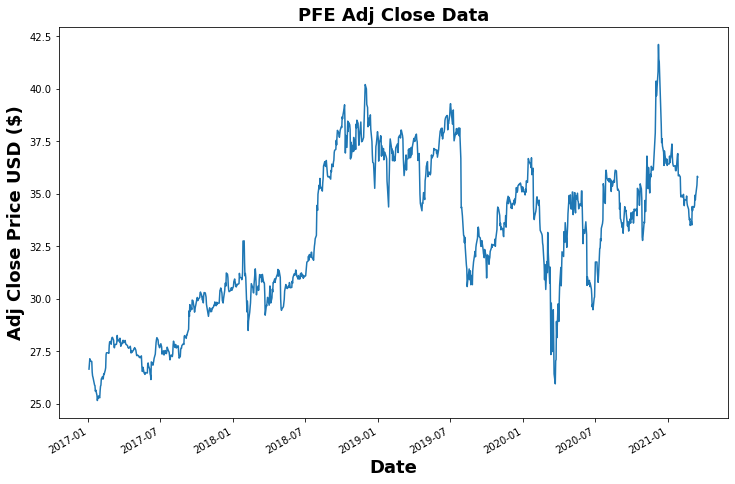

In [356]:
#ema_function(macd_df)
single_plot(macd_df, stock_value='Adj Close', stock_symbol='PFE')

In [341]:
#calculate MACD and signal line indicators
#calculate short term exponential moving average
shortEMA = macd_df['Close'].ewm(span=12, adjust=False).mean() #usaully short term last 12p periods
#calculate long term exponential moving average
longEMA = macd_df['Close'].ewm(span=26, adjust=False).mean() #usually long term lasts 26 periods
#calcualte MACD line
MACD = shortEMA - longEMA
#calcualte signal line
signal = MACD.ewm(span=9, adjust=False).mean() #it's a 9 period exponentally smooth average of MACD line

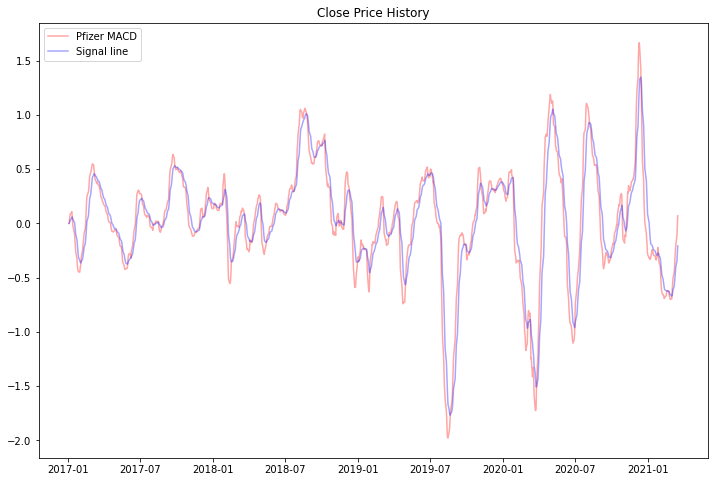

In [355]:
"""
when the macd line crosses the signal line and visa versa
indicaiton that we need to buy or sell the stock
when macd line corsses above signal ine that indcates a good time ot buy
Around 2/17 would be a signal to buy b/c MACD lines cross ablve signal line
"""
plt.figure(figsize=(12,8))
plt.plot(macd_df.index,MACD,label='Pfizer MACD', color='red',alpha=0.35)
plt.plot(macd_df.index,signal, label='Signal line', color='blue',alpha=0.35)
plt.title('Close Price History')
plt.legend(loc='upper left') 

In [343]:
#plot shows where the line cross
#plot will show if we should buy or sell the stock
macd_df['MACD']= MACD
macd_df['signal line'] = signal

In [344]:
macd_df

,Close,Volume,Adj Close,MACD,signal line
Date,,,,,
2017-01-03,31.309298,23391844.0,26.653324,0.000000,0.000000
2017-01-04,31.584440,22753963.0,26.887548,0.021949,0.004390
2017-01-05,31.888046,21083584.0,27.146002,0.063114,0.016135
2017-01-06,31.764706,18418228.0,27.041008,0.084808,0.029869
2017-01-09,31.755219,21559886.0,27.032928,0.100081,0.043912
...,...,...,...,...,...
2021-03-11,34.709999,24511100.0,34.709999,-0.264064,-0.453359
2021-03-12,34.939999,16328500.0,34.939999,-0.201604,-0.403008
2021-03-15,35.410000,21896100.0,35.410000,-0.112878,-0.344982


In [345]:
#function to signal when to buy and when to sell
def buy_sell(signal):
    buy = []
    sell=[]
    flag = -1 #tells me if price after it crosses a specfic point continues to rise or contines to decrease
    #flag will only change when the two lines cross again. Only when a momentum shift.
    
    for i in range(0, len(signal)):#go through each row so I can tell when macd line corsses signal line
        if signal['MACD'][i] > signal['signal line'][i]: #tells us it has crossed signal line
        #if yes, then append to sell list
            sell.append(np.nan)
            if flag != 1: #if flag doesn't equal 1
                buy.append(signal['Close'][i]) #append actual price of the stock
                flag = 1 #set to 1 which indicates we've been here
            else:
                buy.append(np.nan)
            
        elif signal['MACD'][i] < signal['signal line'][i]: #signal line has crossed macd line, tells us it has crossed MACD line
        #if yes, then append to sell list
            buy.append(np.nan)
            if flag != 0: #if flag doesn't equal 1. have we been here before
                sell.append(signal['Close'][i]) #we haven't been here before. append actual close price of the stock
                flag = 0 #set to 1 which indicates we've been here
            else:
                sell.append(np.nan) 
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return buy, sell        

In [346]:
#create a buy and sell column
a = buy_sell(macd_df)
macd_df['Buy_Signal_Price'] = a[0] #a at position 0
macd_df['Sell_Signal_Price'] = a[1] 

In [347]:
macd_df.head()

,Close,Volume,Adj Close,MACD,signal line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,
2017-01-03,31.309298,23391844.0,26.653324,0.000000,0.000000,NaN,NaN
2017-01-04,31.584440,22753963.0,26.887548,0.021949,0.004390,31.58444,NaN
2017-01-05,31.888046,21083584.0,27.146002,0.063114,0.016135,NaN,NaN
2017-01-06,31.764706,18418228.0,27.041008,0.084808,0.029869,NaN,NaN
2017-01-09,31.755219,21559886.0,27.032928,0.100081,0.043912,NaN,NaN


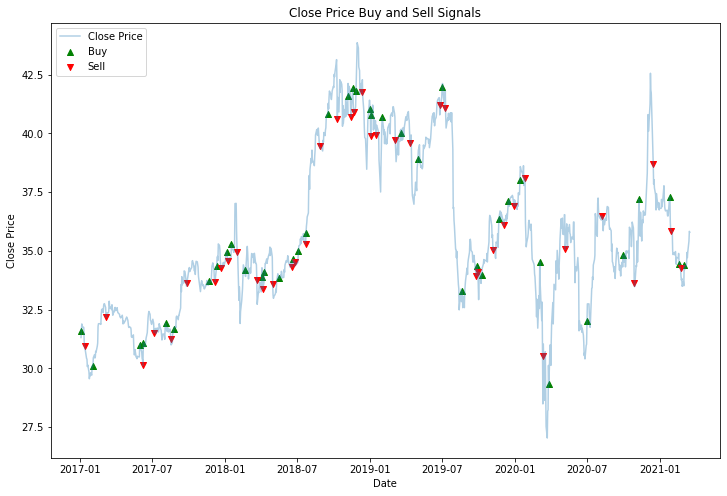

In [348]:
"""
using strategy we can see when to buy and sell the stock
blue lien is actual price of stcok
around 2017/1-we should buy at $30.00 and sell at $32.50
we only used 2 components with this strategy. Can ue it with other indicators
"""
#plot the stock buy and sell signals
plt.figure(figsize=(12,8))
plt.scatter(macd_df.index,macd_df['Buy_Signal_Price'], color='green', label='Buy',marker='^',alpha=1)
plt.scatter(macd_df.index,macd_df['Sell_Signal_Price'], color='red', label='Sell',marker='v',alpha=1)
plt.plot(macd_df['Close'], label='Close Price',alpha=0.35)
plt.title('Close Price Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')

In [349]:
subset = macd_df['2020-02-01':'2020-05-01']

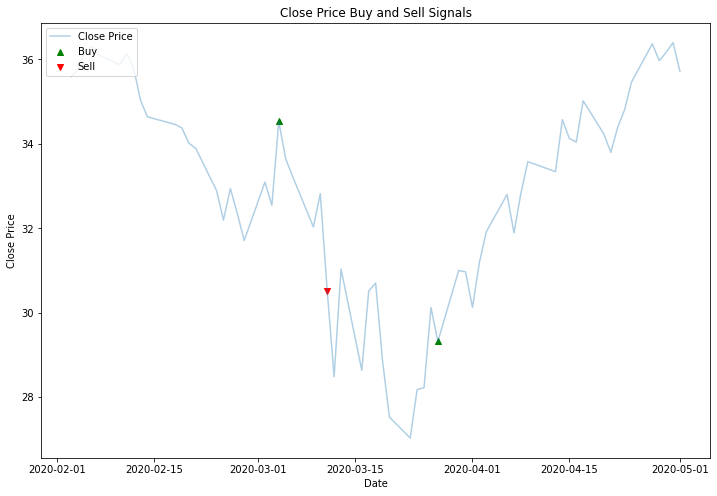

In [350]:
#plot the stock buy and sell signals
plt.figure(figsize=(12,8))
plt.scatter(subset.index,subset['Buy_Signal_Price'], color='green', label='Buy',marker='^',alpha=1)
plt.scatter(subset.index,subset['Sell_Signal_Price'], color='red', label='Sell',marker='v',alpha=1)
plt.plot(subset['Close'], label='Close Price',alpha=0.35)
plt.title('Close Price Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')

#### Exponential Moving Average Crossover Stratergy
Stock market analysts and investors use Exponential Moving Average Crossover strategy, among other moving averages, to analyze price trends and predict upcoming change of trends.  A moving-average crossover occurs when plotting, the two moving averages each based on different time-periods tend to cross. This indicator uses two (or more) moving averages — a faster moving average (short-term) and a slower (long-term) moving average. The faster moving average may be 5-, 10- or 25-day period while the slower moving average can be 50-, 100- or 200-day period.  A short term moving average is faster because it only considers prices over short period of time and is thus more reactive to daily price changes. On the other hand, a long-term moving average is deemed slower as it encapsulates prices over a longer period and is more lethargic.<br>
A crossover occurs when a faster moving average (i.e. a shorter period moving average) crosses a slower moving average (i.e. a longer period moving average). In stock trading, this meeting point can be used as a potential indicator to buy or sell an asset.
When the short term moving average crosses above the long term moving average, this indicates a buy signal.
However, when the short term moving average crosses below the long term moving average, it may be a good moment to sell.<br>

In [44]:
#function to buy and sell the stock
#buy sell signals
def buy_sell_function(data):
    buy_list = []
    sell_list=[]
    flag_long = False
    flag_short = False

    for i in range(0, len(data)):
        if data['middleEMA'][i] < data['longEMA'][i] and data['shortEMA'][i]< data['middleEMA'][i] and flag_long== False and flag_short== False:
                #this is when to buy stock
                buy_list.append(data['Close'][i])
                sell_list.append(np.nan)
                flag_short = True
        #sell if the short/fast moving average crosses above the middle moving average
        elif flag_short == True and data['shortEMA'][i] > data['middleEMA'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_short = False
            
        elif data['middleEMA'][i] > data['longEMA'][i] and data['shortEMA'][i]> data['middleEMA'][i] and flag_long== False and flag_short== False:
                #this is when to buy stock
                buy_list.append(data['Close'][i])
                sell_list.append(np.nan)
                flag_long = True
        #sell if the short/fast moving average crosses above the middle moving average
        elif flag_long == True and data['shortEMA'][i] < data['middleEMA'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_long = False 
        else:
            #if conditions not met for any statement just append to buy, sell lists a nan value
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
           
    return buy_list, sell_list       
            

In [45]:
#add buy and sell signals to dataset
ewma1['Buy'] = buy_sell_function(pfe_df)[0] #return index 0
ewma1['Sell'] = buy_sell_function(pfe_df)[1] #return inddex 1

In [46]:
def ema_signals_function(data):
    plt.figure(figsize=(12,8))
    plt.plot(data['Close'],label='Close Price', color='blue',alpha=0.35)
    plt.plot(data['shortEMA'],label='Short/Fast EMA', color='red',alpha=0.35)
    plt.plot(data['middleEMA'],label='Middle/medium EMA', color='orange',alpha=0.35)
    plt.plot(data['longEMA'],label='Long/slow EMA', color='green',alpha=0.35)
    plt.scatter(data.index,data['Buy'], color='green', marker='^', alpha=1)
    #prices are going to go down
    plt.scatter(data.index,data['Sell'], color='red',marker='v',alpha=1)
    plt.title('Buy and Sell Graph')
    plt.legend() 

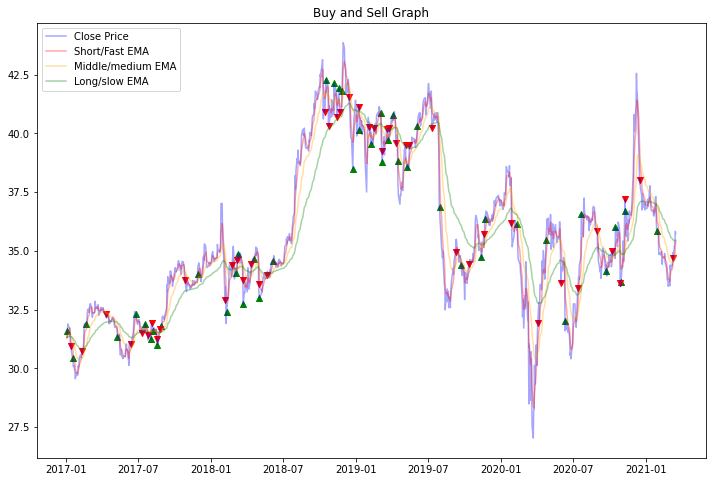

In [47]:
ema_signals_function(data=ewma1)

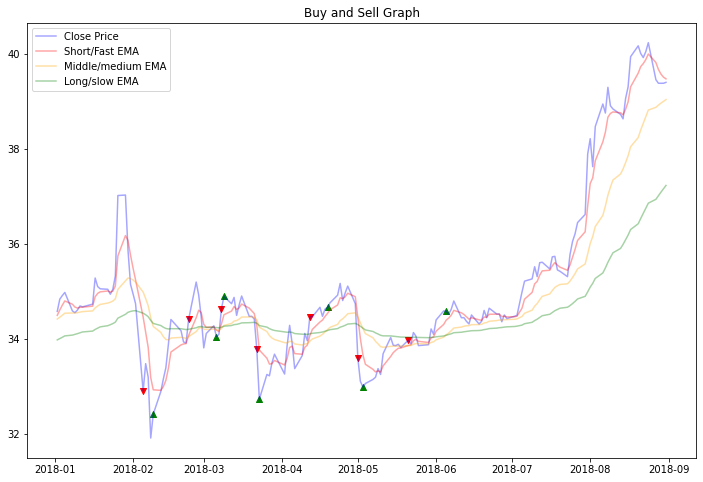

In [48]:
ema_signals_function(data=ewma1['2018-01-01':'2018-09-01'])

In [49]:
ewma1

,Close,Volume,Adj Close,shortEMA,middleEMA,longEMA,Buy,Sell
Date,,,,,,,,
2017-01-03,31.309298,23391844.0,26.653324,31.309298,31.309298,31.309298,NaN,NaN
2017-01-04,31.584440,22753963.0,26.887548,31.401012,31.334311,31.317896,31.58444,NaN
2017-01-05,31.888046,21083584.0,27.146002,31.563357,31.384650,31.335713,NaN,NaN
2017-01-06,31.764706,18418228.0,27.041008,31.630473,31.419201,31.349119,NaN,NaN
2017-01-09,31.755219,21559886.0,27.032928,31.672055,31.449748,31.361810,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-03-11,34.709999,24511100.0,34.709999,34.572754,34.532274,35.452334,NaN,34.709999
2021-03-12,34.939999,16328500.0,34.939999,34.695169,34.569340,35.436323,NaN,NaN
2021-03-15,35.410000,21896100.0,35.410000,34.933446,34.645763,35.435501,NaN,NaN


In [50]:
ewmal_1 = ewma1.copy() 

In [51]:
# Create 20 days exponential moving average column
ewmal_1['20_EMA'] = ewmal_1['Close'].ewm(span = 20, adjust = False).mean()
# Create 50 days exponential moving average column
ewmal_1['50_EMA'] = ewmal_1['Close'].ewm(span = 50, adjust = False).mean()

In [52]:
# create a new column 'Signal' such that if 20-day EMA is greater   # than 50-day EMA then set Signal as 1 else 0
  
ewmal_1['Signal'] = 0.0  
ewmal_1['Signal'] = np.where(ewmal_1['20_EMA'] > ewmal_1['50_EMA'], 1.0, 0.0)


In [53]:
# create a new column 'Position' which is a day-to-day difference of # the 'Signal' column
ewmal_1['Position'] = ewmal_1['Signal'].diff()

In [54]:
ewmal_1.head()

,Close,Volume,Adj Close,shortEMA,middleEMA,longEMA,Buy,Sell,20_EMA,50_EMA,Signal,Position
Date,,,,,,,,,,,,
2017-01-03,31.309298,23391844.0,26.653324,31.309298,31.309298,31.309298,NaN,NaN,31.309298,31.309298,0.0,NaN
2017-01-04,31.584440,22753963.0,26.887548,31.401012,31.334311,31.317896,31.58444,NaN,31.335502,31.320087,1.0,1.0
2017-01-05,31.888046,21083584.0,27.146002,31.563357,31.384650,31.335713,NaN,NaN,31.388125,31.342360,1.0,0.0
2017-01-06,31.764706,18418228.0,27.041008,31.630473,31.419201,31.349119,NaN,NaN,31.423990,31.358923,1.0,0.0
2017-01-09,31.755219,21559886.0,27.032928,31.672055,31.449748,31.361810,NaN,NaN,31.455535,31.374464,1.0,0.0


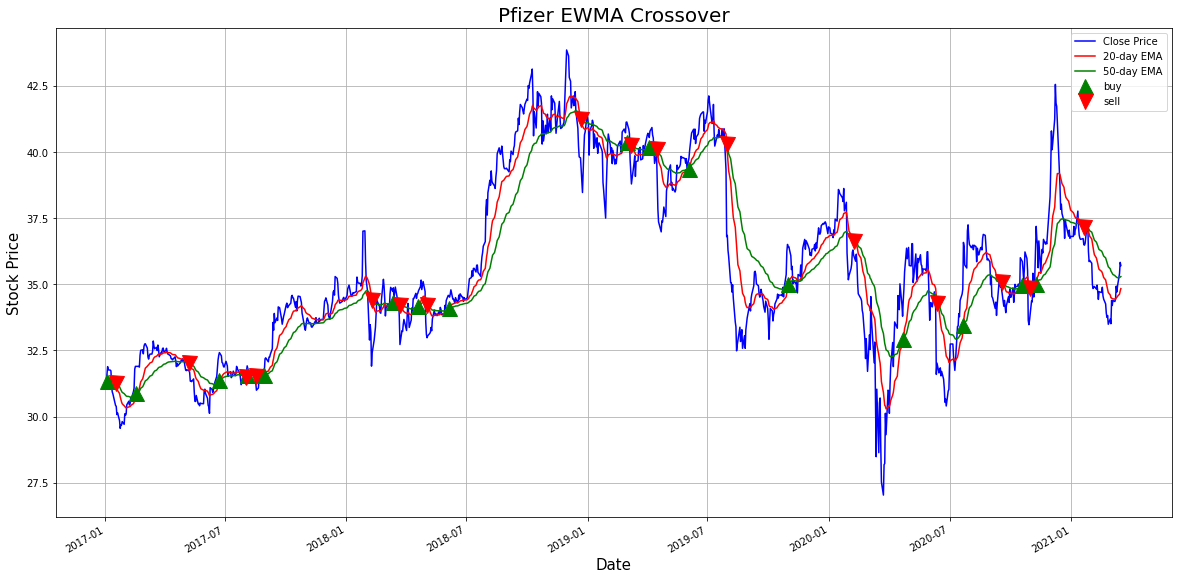

In [55]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
ewmal_1['Close'].plot(color = 'b', label= 'Close Price') 
ewmal_1['20_EMA'].plot(color = 'r',label = '20-day EMA') 
ewmal_1['50_EMA'].plot(color = 'g', label = '50-day EMA')
# plot ‘buy’ signals
plt.plot(ewmal_1[ewmal_1['Position'] == 1].index, 
         ewmal_1['20_EMA'][ewmal_1['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(ewmal_1[ewmal_1['Position'] == -1].index, 
         ewmal_1['20_EMA'][ewmal_1['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Stock Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Pfizer EWMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

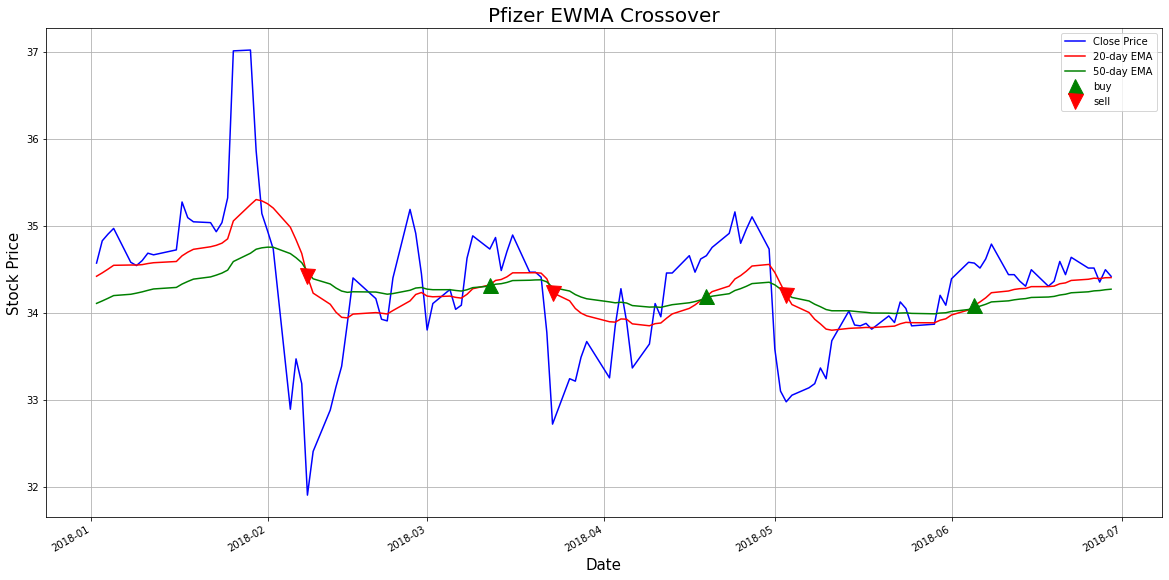

In [56]:
ewmal_2 = ewmal_1['2018-01-01':'2018-07-01']
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
ewmal_2['Close'].plot(color = 'b', label= 'Close Price') 
ewmal_2['20_EMA'].plot(color = 'r',label = '20-day EMA') 
ewmal_2['50_EMA'].plot(color = 'g', label = '50-day EMA')
# plot ‘buy’ signals
plt.plot(ewmal_2[ewmal_2['Position'] == 1].index, 
         ewmal_2['20_EMA'][ewmal_2['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(ewmal_2[ewmal_2['Position'] == -1].index, 
         ewmal_2['20_EMA'][ewmal_2['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Stock Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Pfizer EWMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

### Rate of Change
The Rate of Change (ROC) is a technical indicator that measures the percentage change between the most recent price and the price a specified number of days before. The indicator fluctuates around the zero line.
#### Historical Price Change Analysis
Volatility is the range of price changes a security experiences over a given period of time. If the price stays relatively stable, the security has low volatility. A highly volatile security hits new highs and lows quickly, moves erratically, and has rapid increases and dramatic falls.  Is volatility in price good or bad for trading? This is a complex question with multiple possible answer.  One possible answer is that as the price fluctuates, it provides the opportunity for investors to buy stock in a solid company when the price is very low, and then wait for cumulative growth down the road.  https://www.investopedia.com/ask/answers/010915/volatility-good-thing-or-bad-thing-investors-point-view-and-why.asp<br>
For short-term traders, volatility is even more crucial. Day traders work with changes that occur second-to-second, minute-to-minute. If there is no price change, there is no profit.https://www.investopedia.com/ask/answers/010915/volatility-good-thing-or-bad-thing-investors-point-view-and-why.asp The column 'change' shows how volatile the price change was percentage wise. The graph shows that the data points are now centered aound 0. The graph shows that around 3/20 was a volatile period for the stock price and it increase above 7% and decreased 7%.



### Price Change in Dollars
To see how big the changes in price were on a daily basis we subtract yesterday's closing price yesterday from today.  This will show the change in price.  A column named 'Actual_Changes' is added to calculate actual change in dollars.<br>For example, we can see that on 1/3/17 the Adj Closing price was 26.653324 and on 1/4/17 the Adj Closing price was 26.887548.  The price change $0.234224.<br> 

Scatterplot of absolute value of magnitude change vs. actual change. Let's us see how the price changes daily.<br>

In [57]:
# sdr = multiple_stock_data(ticker=[['PFE','JNJ','NVAX','MRNA','AZN','BNTX']], start='2017',end='today',plot=False, stock_value='Adj Close')
# sdr
price_change = pfe_stock_data.copy()

In [58]:
#leavr off 1 b/c that's default value
#using shift function
#26.887548 - 26.653324 = 0.234224

price_change['Actual_Changes'] = price_change['Adj Close'] - price_change['Adj Close'].shift(1)
# price_change['Expected_Changes'] =price_change['Close'] * #std deviation or 21 day 
price_change

,Close,Volume,Adj Close,Actual_Changes
Date,,,,
2017-01-03,31.309298,23391844.0,26.653324,NaN
2017-01-04,31.584440,22753963.0,26.887548,0.234224
2017-01-05,31.888046,21083584.0,27.146002,0.258453
2017-01-06,31.764706,18418228.0,27.041008,-0.104994
2017-01-09,31.755219,21559886.0,27.032928,-0.008080
...,...,...,...,...
2021-03-11,34.709999,24511100.0,34.709999,-0.220001
2021-03-12,34.939999,16328500.0,34.939999,0.230000
2021-03-15,35.410000,21896100.0,35.410000,0.470001


The below graph shows that for the stated time the stock price difference was rarely positively more than $2.627 than negatviely more than -2.511.  The average daily return was 0.007375.<br>

In [59]:
#the mean (average) change was less than 1 cent
price_change['Actual_Changes'].describe() 

count    1057.000000
mean        0.008568
std         0.476064
min        -2.511635
25%        -0.179653
50%         0.008556
75%         0.215694
max         2.627960
Name: Actual_Changes, dtype: float64

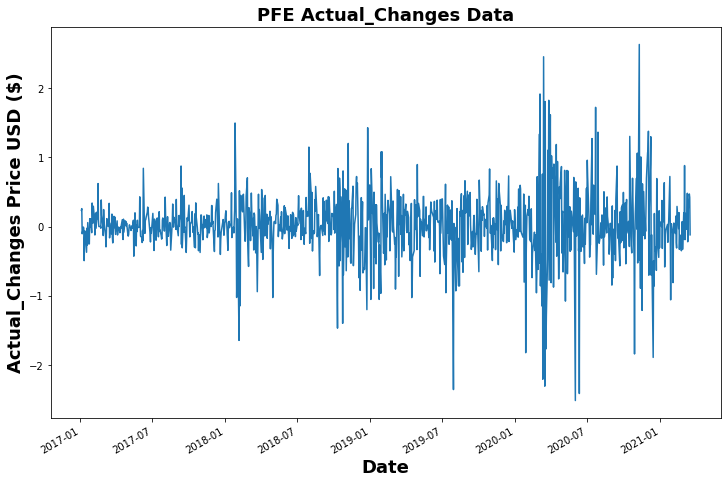

In [357]:
single_plot(price_change, stock_value='Actual_Changes',stock_symbol='PFE')

In [61]:
multi_stocks

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
Date,,,,,,
2017-01-03,26.653324,103.436539,25.400000,NaN,23.433638,NaN
2017-01-04,26.887548,103.266876,26.200001,NaN,23.619688,NaN
2017-01-05,27.146002,104.347321,26.400000,NaN,24.262403,NaN
2017-01-06,27.041008,103.847282,27.400000,NaN,24.042524,NaN
2017-01-09,27.032928,103.829422,28.400000,NaN,24.127094,NaN
...,...,...,...,...,...,...
2021-03-11,34.709999,159.139999,187.630005,140.470001,48.669998,102.599998
2021-03-12,34.939999,159.600006,202.770004,136.990005,48.419998,103.279999
2021-03-15,35.410000,160.419998,217.460007,143.660004,48.770000,107.879997


In [62]:
multi_stocks.describe()

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
count,1058.000000,1058.000000,1058.000000,572.000000,1058.000000,361.000000
mean,32.877689,129.716402,42.965955,49.198941,38.594135,64.196426
std,3.682601,13.474606,50.438368,43.977241,9.148448,31.560594
min,25.159119,99.793396,3.690000,12.260000,22.596422,12.750000
25%,30.063034,120.262554,12.635000,17.810000,30.820116,36.540001
50%,33.124252,128.217926,27.000000,23.675000,36.387133,61.200001
75%,36.073600,139.404289,42.599998,69.097502,47.149688,90.379997
max,42.101986,169.423508,319.929993,185.979996,59.466022,129.539993


In [63]:
multi_price_change = multi_stocks.copy()

In [64]:
multi_price_change = multi_price_change - multi_price_change.shift(1)

In [65]:
#26.887548 - 26.653324= 2.234224
multi_price_change

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.234224,-0.169662,0.800001,NaN,0.186050,NaN
2017-01-05,0.258453,1.080444,0.199999,NaN,0.642715,NaN
2017-01-06,-0.104994,-0.500038,1.000000,NaN,-0.219879,NaN
2017-01-09,-0.008080,-0.017860,1.000000,NaN,0.084570,NaN
...,...,...,...,...,...,...
2021-03-11,-0.220001,-0.009995,15.130005,10.720001,-1.140003,4.580002
2021-03-12,0.230000,0.460007,15.139999,-3.479996,-0.250000,0.680000
2021-03-15,0.470001,0.819992,14.690002,6.669998,0.350002,4.599998


In [351]:
multi_price_change.describe()

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
count,1057.000000,1057.000000,1057.000000,571.000000,1057.000000,360.000000
mean,0.008566,0.054696,0.182961,0.222643,0.025053,0.253556
std,0.476065,1.726928,5.300668,3.679635,0.679653,4.649257
min,-2.511635,-13.964050,-34.299988,-15.680008,-4.421049,-32.700001
25%,-0.179653,-0.568008,-0.600000,-0.715000,-0.245258,-1.842497
50%,0.008556,0.083595,0.000000,0.020000,0.028324,0.125002
75%,0.215694,0.801292,0.799999,1.014999,0.304558,2.329999
max,2.627960,9.590652,86.930008,25.710007,3.912495,26.599998


#### Plot Multi-Stock Price Change

MRNA, AZNA, JNJ didn't have a big daily price differece either psotively or negatively. NVAX did have spikes in daily price 
both psotively and negatively. NVAX average stock price is $41.94.  Around 2/21, the price spiked to 319.929 and 3.690000.  The price had increased $86.930 but then decreased $-34.299.<br>

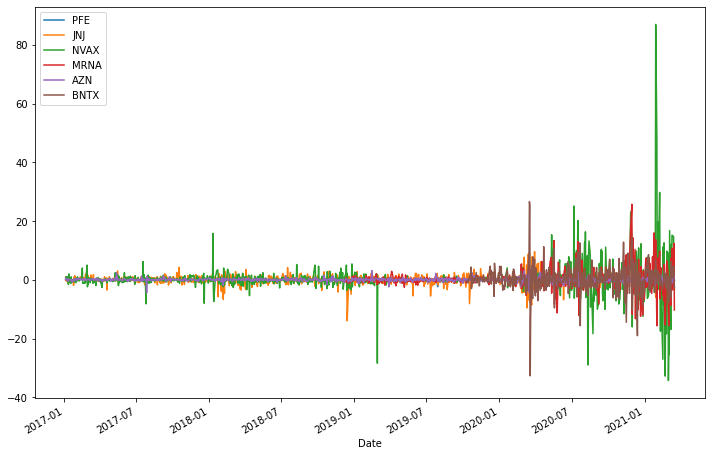

In [66]:
#plt.figure()
multi_price_change.plot(figsize=(12,8))

In [67]:
multi_price_change.describe()

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
count,1057.000000,1057.000000,1057.000000,571.000000,1057.000000,360.000000
mean,0.008566,0.054696,0.182961,0.222643,0.025053,0.253556
std,0.476065,1.726928,5.300668,3.679635,0.679653,4.649257
min,-2.511635,-13.964050,-34.299988,-15.680008,-4.421049,-32.700001
25%,-0.179653,-0.568008,-0.600000,-0.715000,-0.245258,-1.842497
50%,0.008556,0.083595,0.000000,0.020000,0.028324,0.125002
75%,0.215694,0.801292,0.799999,1.014999,0.304558,2.329999
max,2.627960,9.590652,86.930008,25.710007,3.912495,26.599998


### Simple Daily Return
Daily price change as a percentage

In [68]:
multi_stocks.head()

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
Date,,,,,,
2017-01-03,26.653324,103.436539,25.400000,NaN,23.433638,NaN
2017-01-04,26.887548,103.266876,26.200001,NaN,23.619688,NaN
2017-01-05,27.146002,104.347321,26.400000,NaN,24.262403,NaN
2017-01-06,27.041008,103.847282,27.400000,NaN,24.042524,NaN
2017-01-09,27.032928,103.829422,28.400000,NaN,24.127094,NaN


In [69]:
(26.200001 /25.400000) -1

0.0314961023622049

In [70]:
#clculate simple daily return for each day for each stock
#new price(cuurent time period) /old price - 1
#26.887548 - 26.653324=
daily_simple_returns = multi_stocks.pct_change(1) #1 is for 1 day
daily_simple_returns

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.008788,-0.001640,0.031496,NaN,0.007939,NaN
2017-01-05,0.009612,0.010463,0.007634,NaN,0.027211,NaN
2017-01-06,-0.003868,-0.004792,0.037879,NaN,-0.009063,NaN
2017-01-09,-0.000299,-0.000172,0.036496,NaN,0.003518,NaN
...,...,...,...,...,...,...
2021-03-11,-0.006298,-0.000063,0.087710,0.082620,-0.022887,0.046725
2021-03-12,0.006626,0.002891,0.080691,-0.024774,-0.005137,0.006628
2021-03-15,0.013452,0.005138,0.072447,0.048690,0.007228,0.044539


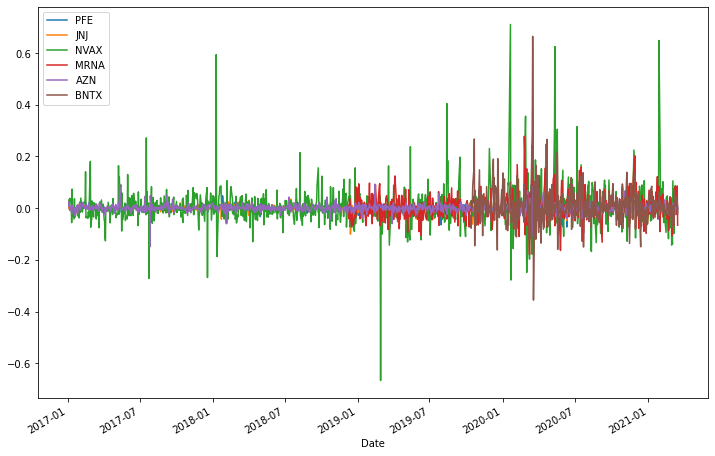

In [71]:
daily_simple_returns.plot(figsize=(12,8))

In [72]:
36.551258 - 37.603287

-1.0520290000000045

#### Volatility

In [73]:
#0.008750

#550–500) / 500)*100

# 26.653324
# 26.887548
# 26.888 - 26.653 = 0.234224
single_sdr = pfe_stock_data.copy()


daily_simple_returns_1 = single_sdr['Adj Close'].pct_change(1) #1 is for 1 day
daily_simple_returns_1

Date
2017-01-03         NaN
2017-01-04    0.008788
2017-01-05    0.009612
2017-01-06   -0.003868
2017-01-09   -0.000299
                ...   
2021-03-11   -0.006298
2021-03-12    0.006626
2021-03-15    0.013452
2021-03-16    0.011861
2021-03-17   -0.003349
Name: Adj Close, Length: 1058, dtype: float64

For most days the daily returns in the price of stock are between 0.025 and -0.025.  There are a few spikes exceeeding 0.050 and -0.050. 

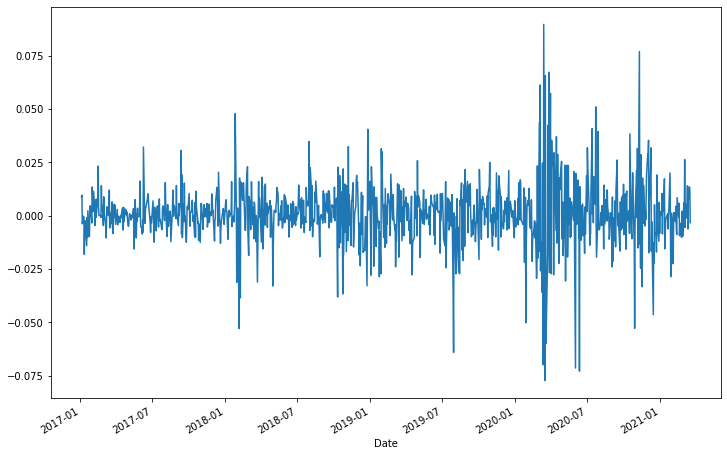

In [74]:
plt.figure(figsize=(12,8))
daily_simple_returns_1.plot()

Text(0, 0.5, 'Frequency')

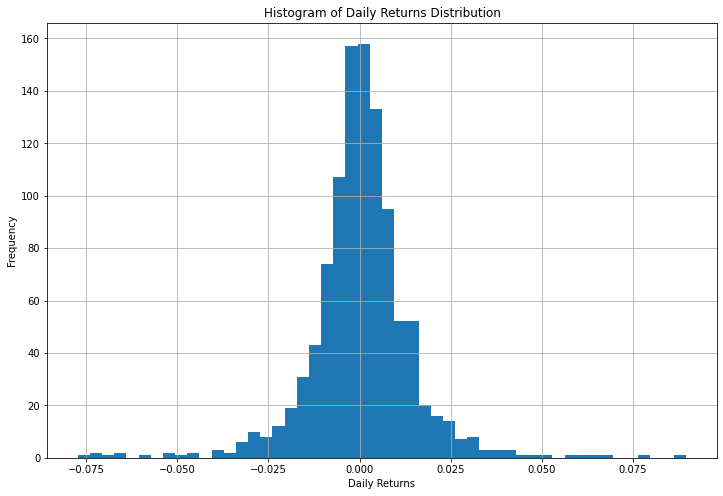

In [75]:
plt.figure(figsize=(12,8))
daily_simple_returns_1.hist(bins=50)
plt.title('Histogram of Daily Returns Distribution')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')

the mean daily returns has been about 0.072 and the daily return was less than 1% for stated time period meaninging that the Pfizer stock has been less volatile over the period.  The highest percentage change in the postive direction was 0.089 and in the negative direction was -0.077. 

In [76]:
daily_simple_returns_1.describe()

count    1057.000000
mean        0.000381
std         0.014417
min        -0.077347
25%        -0.005449
50%         0.000275
75%         0.006509
max         0.089607
Name: Adj Close, dtype: float64

In [77]:
#stock volatility
#print standard deviaiton for daily simple return
#volatility is standard deviation
#Most volatile stock is NVAX, least volatile stock is JNJ
#the higher the volaitility the higher hte return, the lower volatility the lower return
#expect a lower return for JNJ as opposed to BNTX
print('The Stock Volatility')
daily_simple_returns.std()

The Stock Volatility


PFE     0.014417
JNJ     0.013273
NVAX    0.077155
MRNA    0.052428
AZN     0.016443
BNTX    0.077759
dtype: float64

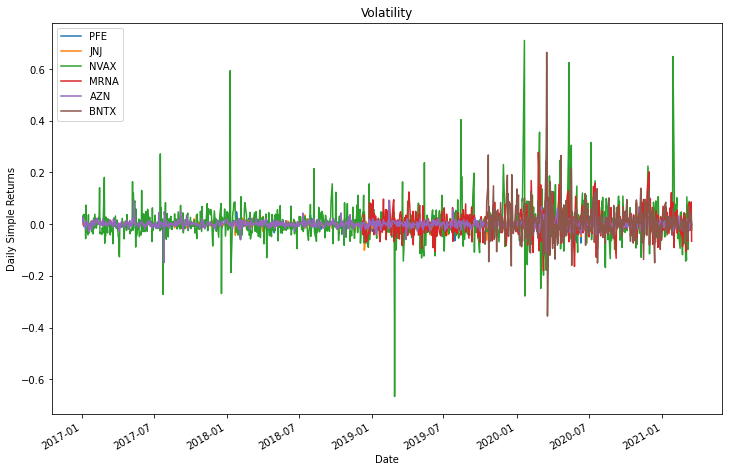

In [78]:
#vislauize stocks simple daily returns/Volaitilty
#NVAX and BNTX are very volatile
#AZN is right in the middle and not that voaltile
daily_simple_returns.plot(figsize=(12,8));
plt.title('Volatility')
plt.ylabel('Daily Simple Returns')
plt.legend()

In [79]:
#mean of daily simple return
#highest return should be NBTX and lowest for PFE
mean_dsr = daily_simple_returns.mean()
print('The Daily Mean Simple Return')
mean_dsr

The Daily Mean Simple Return


PFE     0.000381
JNJ     0.000509
NVAX    0.004922
MRNA    0.004950
AZN     0.000852
BNTX    0.008390
dtype: float64

In [80]:
#calculate historical volatility
prct_change = price_change.copy()
prct_change['change'] = np.log(prct_change['Close'] / prct_change['Close'].shift()) #divide by previous days close

In [81]:
#prct_change

In [82]:
#graph centered around 0
#price only went up 7% twice and around 3/20 went down below 7% a few times
#8/19 went below &%
# plt.figure(figsize=(12,6))
# plt.plot(prct_change['change'])

### Historical Volatility

In [83]:
#use  rolling standard deviation to get that 
#use 21 day rolling window b/c there are 21 traing days in a month on average
#this will include 21st observation
#but volatility should be used from next day
prct_change['Volatility'] = prct_change['change'].rolling(21).std().shift(1)

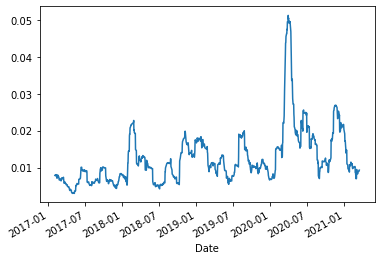

In [84]:
#what price volatility looks like over time
#4/20 was a highly volatile period
prct_change['Volatility'].plot()

In [85]:
#use rolling standard deviation to ge that. Use 21 day rolling window.
#use today's volatility at close today to predcit a 1 std move tomorrow
prct_change['Expected_Change'] = prct_change['Close'].shift(1) * prct_change['Volatility'] #1 std or 21 day rolling std
prct_change = prct_change.iloc[1:]
prct_change

,Close,Volume,Adj Close,Actual_Changes,change,Volatility,Expected_Change
Date,,,,,,,
2017-01-04,31.584440,22753963.0,26.887548,0.234224,0.008750,NaN,NaN
2017-01-05,31.888046,21083584.0,27.146002,0.258453,0.009567,NaN,NaN
2017-01-06,31.764706,18418228.0,27.041008,-0.104994,-0.003875,NaN,NaN
2017-01-09,31.755219,21559886.0,27.032928,-0.008080,-0.000299,NaN,NaN
2017-01-10,31.726755,20444754.0,27.008699,-0.024229,-0.000897,NaN,NaN
...,...,...,...,...,...,...,...
2021-03-11,34.709999,24511100.0,34.709999,-0.220001,-0.006318,0.008952,0.312708
2021-03-12,34.939999,16328500.0,34.939999,0.230000,0.006604,0.009006,0.312600
2021-03-15,35.410000,21896100.0,35.410000,0.470001,0.013362,0.009009,0.314784


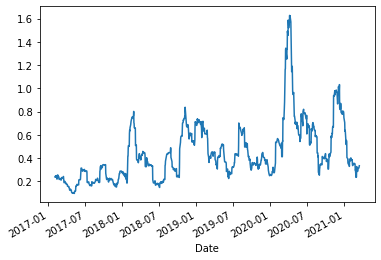

In [86]:
prct_change['Expected_Change'].plot()

In [87]:
#magnitude of change
#divide actual change by expected change
#end up w/values in standard deviations
prct_change['Magnitude'] = prct_change['Actual_Changes'] / prct_change['Expected_Change']

(array([  1.,   0.,   2.,   1.,   1.,   0.,   3.,   3.,   2.,   1.,   2.,
          5.,   7.,   5.,   6.,  12.,  27.,  23.,  45.,  58.,  78., 117.,
        117., 104., 110.,  73.,  83.,  43.,  41.,  18.,  11.,   6.,  12.,
          1.,   4.,   3.,   1.,   2.,   1.,   1.,   2.,   1.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([-5.08297846, -4.86073298, -4.6384875 , -4.41624201, -4.19399653,
        -3.97175104, -3.74950556, -3.52726007, -3.30501459, -3.08276911,
        -2.86052362, -2.63827814, -2.41603265, -2.19378717, -1.97154168,
        -1.7492962 , -1.52705072, -1.30480523, -1.08255975, -0.86031426,
        -0.63806878, -0.41582329, -0.19357781,  0.02866767,  0.25091316,
         0.47315864,  0.69540413,  0.91764961,  1.1398951 ,  1.36214058,
         1.58438606,  1.80663155,  2.02887703,  2.25112252,  2.473368  ,
         2.69561349,  2.91785897,  3.14010446,  3.36234994,  3.58459542,
         3.8068409

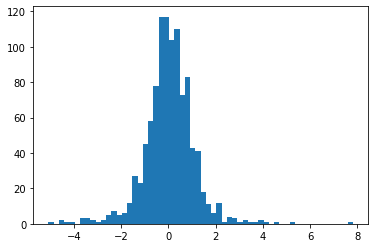

In [88]:
#idea of typical distrubution of changes in terms of standard deviation
#mostly w/in 3 stadnard deviaitons of mean
#could be more of positve change
#kind of equal happening on positve and negative side
plt.hist(prct_change['Magnitude'], bins='auto')

### Relative Strength Index (RSI)
The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. The RSI is displayed as an oscillator (a line graph that moves between two extremes) and can have a reading from 0 to 100.  An asset is usually considered overbought when the value is above 70% and oversold when it is below 30%.  
https://www.investopedia.com/terms/r/rsi.asp Overbought refers that the bubble created from the buying might pop soon, and therefore the price will drop. This creates a strong entry point.  interpretation of the RSI is that values of 70 or above indicate that a security is becoming overvalued or overbought and may be due for a trend reversal or correction in price. An RSI value of 30 or below indicates an undervalued or oversold scenario.<br>
<br>
7/19-RSI value dips below 10 indicator, the 10 significant level.
    Tells us stock was oversold and presents a buying opportunity
On Adj Close plot was see that around 7/19 the price dipped from around \\$40.00 to \\$30.00.
    Then the price increased significantly again.
If you followed RSI you wuold have prucahsed around \\$30.00 and prcie jumped to \\$37.5 around 1/20.    

Around 7/18 to 9/18- Looks like stock was being over bought.  RSI value passed 80 level significant indicator.
    price was around \\$38.00 to \\$40.00.
    Pricde did drop to almost $35.00. Would have been a good time to drop prior to the drop.
    Would have saved some money from selling

In [89]:
rsi_df = pfe_stock_data.copy()
rsi_df

,Close,Volume,Adj Close
Date,,,
2017-01-03,31.309298,23391844.0,26.653324
2017-01-04,31.584440,22753963.0,26.887548
2017-01-05,31.888046,21083584.0,27.146002
2017-01-06,31.764706,18418228.0,27.041008
2017-01-09,31.755219,21559886.0,27.032928
...,...,...,...
2021-03-11,34.709999,24511100.0,34.709999
2021-03-12,34.939999,16328500.0,34.939999
2021-03-15,35.410000,21896100.0,35.410000


In [90]:
def rsi_function(data, col=None):
    rsi_d = data[col].diff(1)
    rsi_d = rsi_d.dropna()
    #get the postive gains (up) and negative gains(down)
    up = rsi_d.copy()
    down = rsi_d.copy()
    #get the postive values in delta
    up[up < 0]=0  #for any values in up that are less than 0. Any values n up that are less than 0, we'll set to 0
    down[down > 0]=0  #values in down that are greater than 0, they're positive. Set those values equal to 0.
    #up only contins positve values and down only contains negative values
    #Get the time period.  RSI is usually 14 day period
    period=14
    #calculate the average gain and average loss
    AVG_gain = up.rolling(window=period).mean()
    AVG_loss = abs(down.rolling(window=period).mean()) #going to be negative values so use absolute
    #calcualte RSI
    #calcualte relative strength (Rs)
    RS = AVG_gain / AVG_loss
    #calcualte relative strength Index (RSI)
    RSI = 100.0 - (100.0 / (1.0 + RS))
    #new dataframe
    new_df = pd.DataFrame()
    new_df[col] = rsi_df[col]
    new_df['RSI'] = RSI
    
    #plot adjusted close
    plt.figure(figsize=(12,8))
    plt.plot(new_df.index, new_df['Adj Close'])
    plt.title(f'{col} Price History for Pfizer')
    plt.legend(new_df.columns.values, loc='upper left')
    #plot RSI values and signficant levels
    plt.figure(figsize=(12,8))
    plt.title('RSI')
    plt.plot(new_df.index,new_df['RSI'])
    plt.axhline(0, linestyle='--', alpha=0.5,color='gray')
    plt.axhline(10, linestyle='--', alpha=0.5,color='orange')
    plt.axhline(20, linestyle='--', alpha=0.5,color='green')
    plt.axhline(30, linestyle='--', alpha=0.5,color='red')
    plt.axhline(70, linestyle='--', alpha=0.5,color='red')
    plt.axhline(80, linestyle='--', alpha=0.5,color='green')
    plt.axhline(90, linestyle='--', alpha=0.5,color='orange')
    plt.axhline(100, linestyle='--', alpha=0.5,color='gray')
    
    return new_df

,Adj Close,RSI
Date,,
2017-01-03,26.653324,NaN
2017-01-04,26.887548,NaN
2017-01-05,27.146002,NaN
2017-01-06,27.041008,NaN
2017-01-09,27.032928,NaN
...,...,...
2021-03-11,34.709999,53.781523
2021-03-12,34.939999,59.392282
2021-03-15,35.410000,70.053487


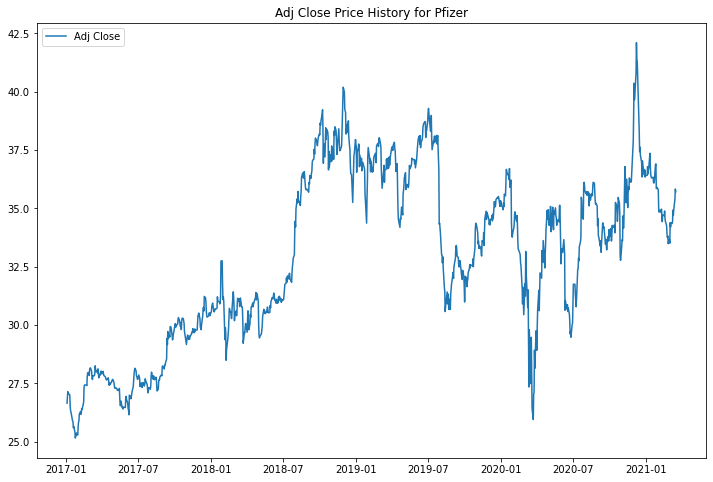

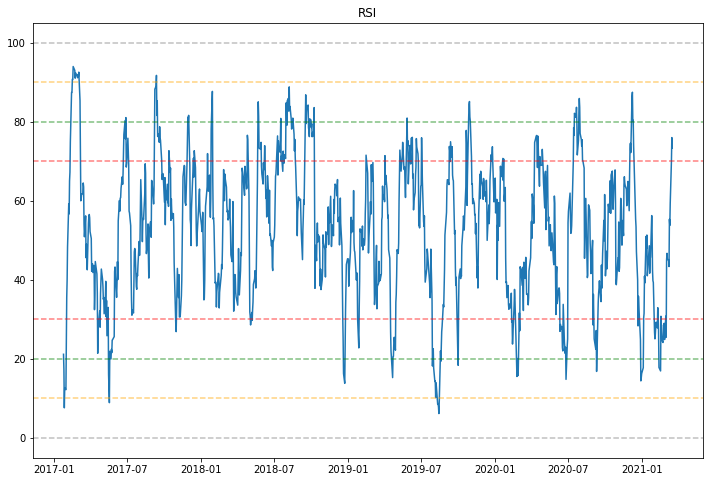

In [91]:
rsi_function(rsi_df, col='Adj Close')

## Question 2: How well can historical data and algorithms predict future stocks prices? 
This section focuses on using Long Short Term Memory (LSTM) and SARIMA models to predict future stock prices.

In [92]:
#start='01-01-2019',end='today',
#df_single = single_stock_data('PFE', start='01-01-2019',end='today',plot=True,stock_value='Adj Close')

## Sarima Model

In [93]:
import six
import joblib
import sys
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib
import pmdarima as pm
from pmdarima import auto_arima

import statsmodels.api as sm

In [94]:
sarima_data = pfe_stock_data.copy()

In [95]:
def delta_data(data,col=None):
    data['Actual_Changes'] = data[col] - data[col].shift(1)
    data['Percent_Chg'] = data[col].pct_change(1)
    data['MA_50'] = data[col].rolling(50).mean()
    data = data.dropna()
    return data

In [96]:
sarima_df = delta_data(sarima_data,col='Adj Close')#delta_time_series(multi_stocks, col='Adj Close')

In [97]:
sarima_df

,Close,Volume,Adj Close,Actual_Changes,Percent_Chg,MA_50
Date,,,,,,
2017-03-15,32.855785,24279839.0,28.254789,0.334522,0.011981,26.801835
2017-03-16,32.666035,21816219.0,28.091606,-0.163183,-0.005775,26.830601
2017-03-17,32.561668,45736117.0,28.001856,-0.089750,-0.003195,26.852887
2017-03-20,32.618595,18435514.0,28.050808,0.048952,0.001748,26.870983
2017-03-21,32.495255,33083479.0,27.944742,-0.106066,-0.003781,26.889058
...,...,...,...,...,...,...
2021-03-11,34.709999,24511100.0,34.709999,-0.220001,-0.006298,35.347557
2021-03-12,34.939999,16328500.0,34.939999,0.230000,0.006626,35.313331
2021-03-15,35.410000,21896100.0,35.410000,0.470001,0.013452,35.294639


##### Train/Test Split

In [98]:
#training_data_len, dataset, scaler, scaled_data = preprocessing(df_data['Adj Close'], percentage=.8)
n = int(len(sarima_df) * 0.8)
train = sarima_df[:n]
test = sarima_df[n:]

##### ARIMA Model

In [99]:
def arima_model(df):
    """
    df- dataframe
    function is a gridsearch to get optimal p,d,qs and lowest AIC for the model.
    q-is moving average
    """
    autoarima_model = auto_arima(df, start_p = 0, start_q = 0, #start_q = 0
                              test='adf',             # use adftest to find optimal 'd'
                              max_p = 3, max_q = 3,   # maximum p and q
                              m = 12,                  #frequency of series 
                              d = None,               # let model determine 'd', was 1
                              seasonal = True, 
                              start_P=0, D=1, trace = False, #start  #trace= True
                              error_action ='ignore',   # we don't want to know if an order does not work 
                              suppress_warnings = True,  # we don't want convergence warnings 
                              stepwise = True)           # set to stepwise  
    
    #print('\n')
    #display(autoarima_model.summary())
    
    return autoarima_model


###### ARIMA / Adj Close

In [100]:
sarima_col = 'Adj Close'

In [101]:
stepwise_fit = arima_model(train[sarima_col])

In [102]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  807
Model:             SARIMAX(3, 0, 2)x(1, 1, [1], 12)   Log Likelihood                -511.982
Date:                              Wed, 17 Mar 2021   AIC                           1041.963
Time:                                      14:28:34   BIC                           1084.068
Sample:                                           0   HQIC                          1058.143
                                              - 807                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.571e-05      0.000      0.060      0.952      -0.001       0.001
ar.L1         -0.7104      0.034    -21.120      0.000      -0.776      -0.644
ar.L2          0.7938      0.018     44.298      0.000       0.759       0.829
ar.L3          0.9163      0.033     27.456      0.000       0.851       0.982
ma.L1          1.6349      0.042     38.515      0.000       1.552       1.718
ma.L2          0.8528      0.042     20.074      0.000       0.770       0.936
ar.S.L12       0.0313      0.032      0.967      0.334      -0.032       0.095
ma.S.L12      -0.9894      0.049    -20.388      0.000      -1.085      -0.894
sigma2         0.2000      0.009     21.562      0.000       0.182       0.218
===================================================================================
Ljung-Box (Q):                       76.68   Jarque-Bera (JB):               745.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.89   Skew:                            -0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [103]:
arima_list = [['hist', 'pdq','seasonal_pdq','aic']] 
for col in sarima_df.columns:
  zip_test_2 = arima_model(sarima_df[col])
  arima_list.append([col,zip_test_2.order, zip_test_2.seasonal_order, zip_test_2.aic()])
#result   
output_df = pd.DataFrame(arima_list[1:],columns=arima_list[0]) 
output_df  

,hist,pdq,seasonal_pdq,aic
0,Close,"(3, 0, 0)","(1, 1, 1, 12)",1563.060531
1,Volume,"(2, 0, 1)","(1, 1, 2, 12)",35421.178285
2,Adj Close,"(3, 0, 0)","(1, 1, 1, 12)",1439.640770
3,Actual_Changes,"(1, 0, 3)","(1, 1, 1, 12)",1436.677763
4,Percent_Chg,"(1, 0, 0)","(1, 1, 1, 12)",-5532.137487
5,MA_50,"(2, 0, 0)","(0, 1, 2, 12)",-5713.104876


In [104]:
def fit_ARIMA(df, order=None, seasonal_order=None):
    """
    forecasting statsmodel SARIMAX model
    """
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df, 
                                        order=order, 
                                        seasonal_order=seasonal_order, 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

    # Fit the model and print results
    output = ARIMA_MODEL.fit()

    #display / no tables 1
    display(output.summary())
    
    print('\n')
    print('MODEL DIAGNOSTICS')
    
    output.plot_diagnostics(figsize=(15, 18));
    plt.show()
    
    return output

In [105]:
#train['Adj Close'][[0,-1]]
train[sarima_col][[0,-1]]

Date
2017-03-15    28.254789
2020-05-28    35.125996
Name: Adj Close, dtype: float64

In [106]:
#test['Adj Close'][[0,-1]]
test[sarima_col][[0,-1]]

Date
2020-05-29    35.135204
2021-03-17    35.709999
Name: Adj Close, dtype: float64

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Adj Close   No. Observations:                 1009
Model:             SARIMAX(3, 0, 0)x(1, 1, [1], 12)   Log Likelihood                -709.752
Date:                              Wed, 17 Mar 2021   AIC                           1431.504
Time:                                      15:09:34   BIC                           1460.842
Sample:                                           0   HQIC                          1442.665
                                             - 1009                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9257      0.019     47.742      0.000       0.888       0.964
ar.L2          0.1179      0.026      4.616      0.000       0.068       0.168
ar.L3         -0.0548      0.020     -2.691      0.007      -0.095      -0.015
ar.S.L12       0.0409      0.028      1.481      0.139      -0.013       0.095
ma.S.L12      -1.0000     32.727     -0.031      0.976     -65.143      63.143
sigma2         0.2358      7.717      0.031      0.976     -14.889      15.360
===================================================================================
Ljung-Box (Q):                       86.87   Jarque-Bera (JB):              1142.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.77   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""



MODEL DIAGNOSTICS


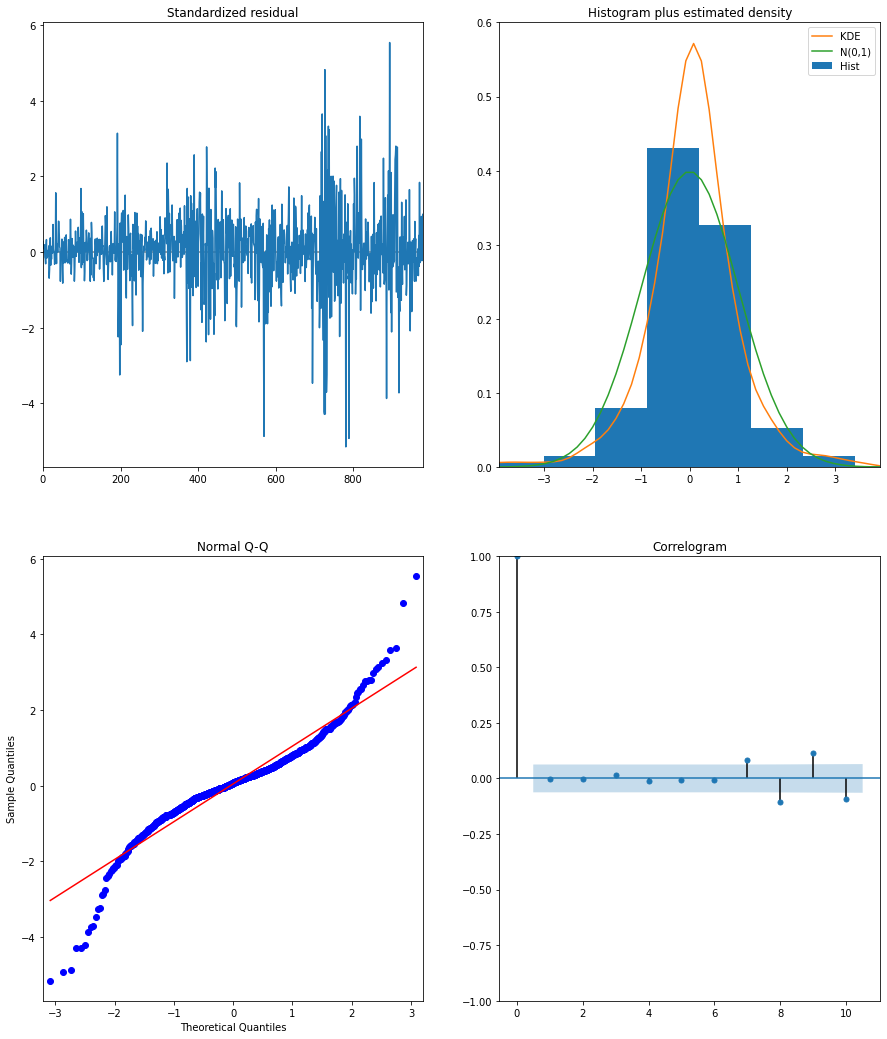

In [107]:
hist_type = sarima_col #hist_type = 'Adj Close'
hist_params= output_df[output_df['hist']==hist_type]
hist_params.pdq.values[0]
hist_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(sarima_df[hist_type],order=hist_params.pdq.values[0], seasonal_order= hist_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 

pred = output_sarima.get_prediction(start=pd.to_datetime('2020-01-10'), dynamic=False)
pred_conf = pred.conf_int()

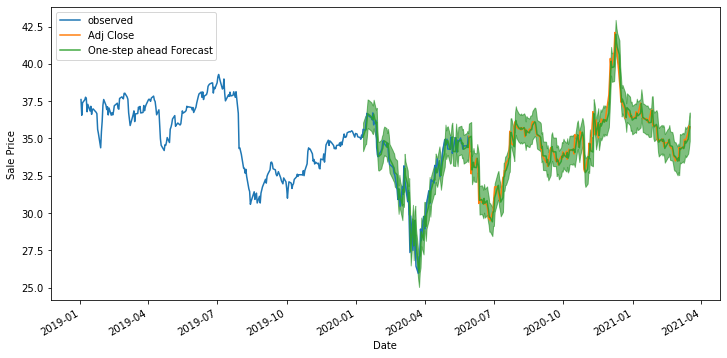

In [108]:
plt.figure(figsize=(12,6))
# Plot observed values

#ax = train['Adj Close']['2019':].plot(label='observed')
ax = train[sarima_col]['2019':].plot(label='observed')#
#test['Adj Close']['2019':].plot()#label='Test'
test[sarima_col]['2019':].plot()#label='Test'
# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Sale Price')
plt.legend()

In [109]:
# Get the real and predicted values
forecast = pred.predicted_mean
actual =test[sarima_col]['1996':] #actual =test['Adj Close']['1996':]

# Compute the root mean square error
mse = ((forecast - actual) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#np.sqrt(np.mean((predictions-targets)**2))
rmse = np.sqrt(np.mean((forecast - actual) ** 2))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 0.35
The Root Mean Squared Error of our forecasts is 0.59


/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Adj Close   No. Observations:                 1009
Model:             SARIMAX(3, 0, 0)x(1, 1, [1], 12)   Log Likelihood                -709.752
Date:                              Wed, 17 Mar 2021   AIC                           1431.504
Time:                                      15:09:41   BIC                           1460.842
Sample:                                           0   HQIC                          1442.665
                                             - 1009                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9257      0.019     47.742      0.000       0.888       0.964
ar.L2          0.1179      0.026      4.616      0.000       0.068       0.168
ar.L3         -0.0548      0.020     -2.691      0.007      -0.095      -0.015
ar.S.L12       0.0409      0.028      1.481      0.139      -0.013       0.095
ma.S.L12      -1.0000     32.727     -0.031      0.976     -65.143      63.143
sigma2         0.2358      7.717      0.031      0.976     -14.889      15.360
===================================================================================
Ljung-Box (Q):                       86.87   Jarque-Bera (JB):              1142.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.77   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""



MODEL DIAGNOSTICS


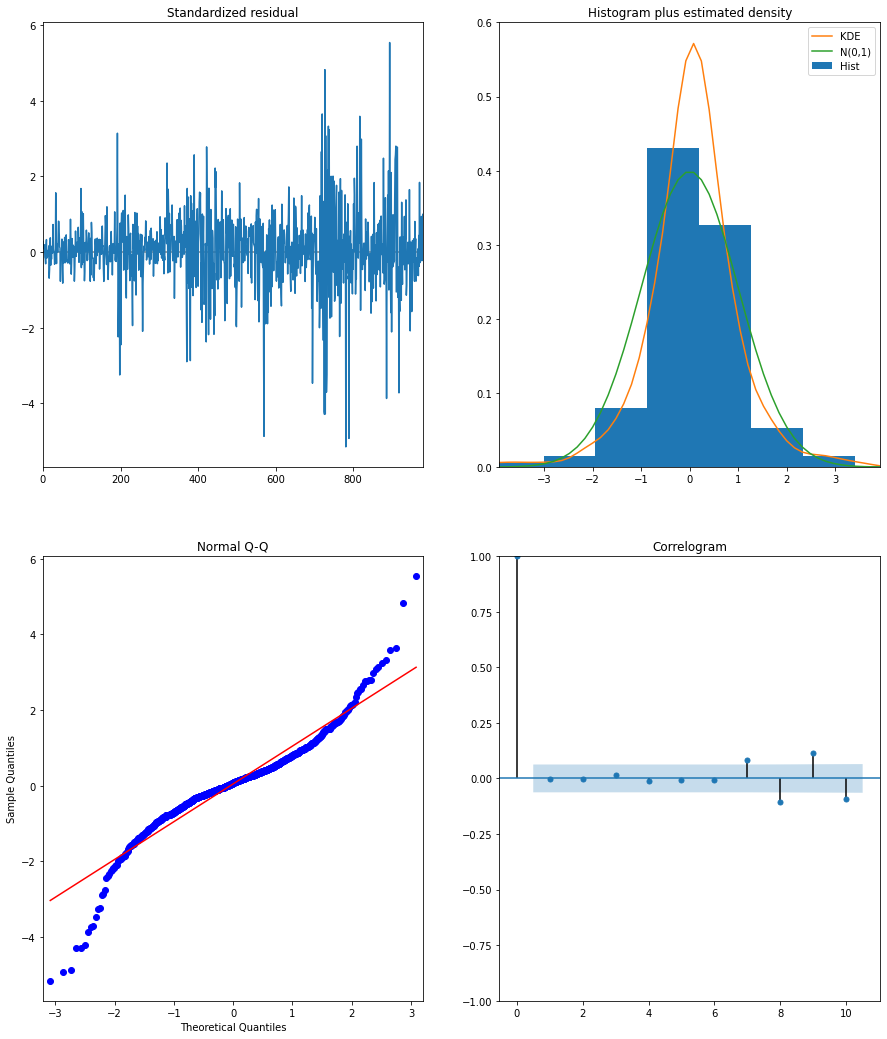

In [110]:
history_type = sarima_col #history_type = 'Adj Close'
zip_params = output_df[output_df['hist']==history_type]
zip_params.pdq.values[0]
zip_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(sarima_df[history_type],order=zip_params.pdq.values[0] ,seasonal_order= zip_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output_sarima.get_prediction(start=pd.to_datetime('2020-01-10'), dynamic=True,full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

In [111]:
def prediction_vis(pred_dynamic,pred_dynamic_conf, y):
  # Plot the dynamic forecast with confidence intervals.
  plt.figure(figsize=(12,5))
  # Plot observed values
  ax = y.plot(label='Observed')

  # Plot predicted values
  pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic Forecast', alpha=0.9)

  # Plot the range for confidence intervals
  ax.fill_between(pred_dynamic_conf.index,
                  pred_dynamic_conf.iloc[:, 0],
                  pred_dynamic_conf.iloc[:, 1], color='g', alpha=0.5)

  # Set axes labels
  ax.set_xlabel('Date')
  ax.set_ylabel('Sale Price')
  plt.legend()

  return ax

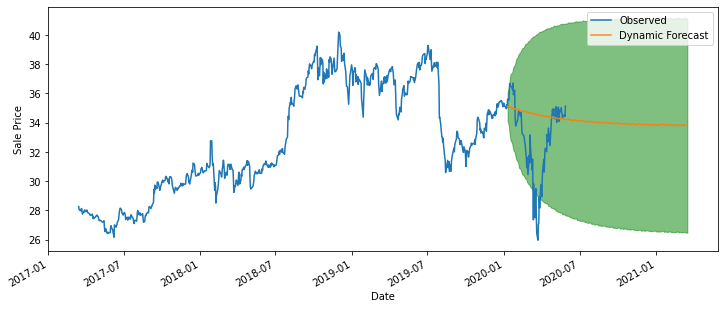

In [112]:
prediction_visual = prediction_vis(pred_dynamic,pred_dynamic_conf,train[history_type])
prediction_visual

In [113]:
# Get the real and predicted values
forecast = pred_dynamic.predicted_mean
actual = train[history_type]#['1996':]

# Compute the mean square error
mse = ((forecast - actual) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#np.sqrt(np.mean((predictions-targets)**2))
rmse = np.sqrt(np.mean((forecast - actual) ** 2))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 9.57
The Root Mean Squared Error of our forecasts is 3.09


In [114]:
sarima_col_1 = 'MA_50'

In [115]:
#stepwise_fit = arima_model(train['Adj Close'])
stepwise_fit = arima_model(train[sarima_col])

In [116]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  807
Model:             SARIMAX(3, 0, 2)x(1, 1, [1], 12)   Log Likelihood                -511.982
Date:                              Wed, 17 Mar 2021   AIC                           1041.963
Time:                                      15:15:22   BIC                           1084.068
Sample:                                           0   HQIC                          1058.143
                                              - 807                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.571e-05      0.000      0.060      0.952      -0.001       0.001
ar.L1         -0.7104      0.034    -21.120      0.000      -0.776      -0.644
ar.L2          0.7938      0.018     44.298      0.000       0.759       0.829
ar.L3          0.9163      0.033     27.456      0.000       0.851       0.982
ma.L1          1.6349      0.042     38.515      0.000       1.552       1.718
ma.L2          0.8528      0.042     20.074      0.000       0.770       0.936
ar.S.L12       0.0313      0.032      0.967      0.334      -0.032       0.095
ma.S.L12      -0.9894      0.049    -20.388      0.000      -1.085      -0.894
sigma2         0.2000      0.009     21.562      0.000       0.182       0.218
===================================================================================
Ljung-Box (Q):                       76.68   Jarque-Bera (JB):               745.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.89   Skew:                            -0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [117]:
arima_list = [['hist', 'pdq','seasonal_pdq','aic']] 
for col in sarima_df.columns:
  zip_test_2 = arima_model(sarima_df[col])
  arima_list.append([col,zip_test_2.order, zip_test_2.seasonal_order, zip_test_2.aic()])
#result   
output_df = pd.DataFrame(arima_list[1:],columns=arima_list[0]) 
output_df  

,hist,pdq,seasonal_pdq,aic
0,Close,"(3, 0, 0)","(1, 1, 1, 12)",1563.060531
1,Volume,"(2, 0, 1)","(1, 1, 2, 12)",35421.178285
2,Adj Close,"(3, 0, 0)","(1, 1, 1, 12)",1439.640770
3,Actual_Changes,"(1, 0, 3)","(1, 1, 1, 12)",1436.677763
4,Percent_Chg,"(1, 0, 0)","(1, 1, 1, 12)",-5532.137487
5,MA_50,"(2, 0, 0)","(0, 1, 2, 12)",-5713.104876


In [118]:
def fit_ARIMA(df, order=None, seasonal_order=None):
    """
    forecasting statsmodel SARIMAX model
    """
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df, 
                                        order=order, 
                                        seasonal_order=seasonal_order, 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

    # Fit the model and print results
    output = ARIMA_MODEL.fit()

    #display / no tables 1
    display(output.summary())
    
    print('\n')
    print('MODEL DIAGNOSTICS')
    
    output.plot_diagnostics(figsize=(15, 18));
    plt.show()
    
    return output

In [119]:
#train['Adj Close'][[0,-1]]
train[sarima_col_1][[0,-1]]

Date
2017-03-15    26.801835
2020-05-28    32.441697
Name: MA_50, dtype: float64

In [120]:
#test['Adj Close'][[0,-1]]
test[sarima_col_1][[0,-1]]

Date
2020-05-29    32.554846
2021-03-17    35.268884
Name: MA_50, dtype: float64

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                   MA_50   No. Observations:                 1009
Model:             SARIMAX(2, 0, 0)x(0, 1, [1, 2], 12)   Log Likelihood                2733.089
Date:                                 Wed, 17 Mar 2021   AIC                          -5456.178
Time:                                         15:37:56   BIC                          -5431.782
Sample:                                              0   HQIC                         -5446.893
                                                - 1009                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9688      0.005    398.617      0.000       1.959       1.978
ar.L2         -0.9710      0.005   -196.220      0.000      -0.981      -0.961
ma.S.L12      54.8847    3.3e-06   1.66e+07      0.000      54.885      54.885
ma.S.L24     -38.2899   4.95e-06  -7.73e+06      0.000     -38.290     -38.290
sigma2      5.142e-08   1.32e-09     38.855      0.000    4.88e-08     5.4e-08
===================================================================================
Ljung-Box (Q):                      149.38   Jarque-Bera (JB):               133.65
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.35   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.02e+23. Standard errors may be unstable.
"""



MODEL DIAGNOSTICS


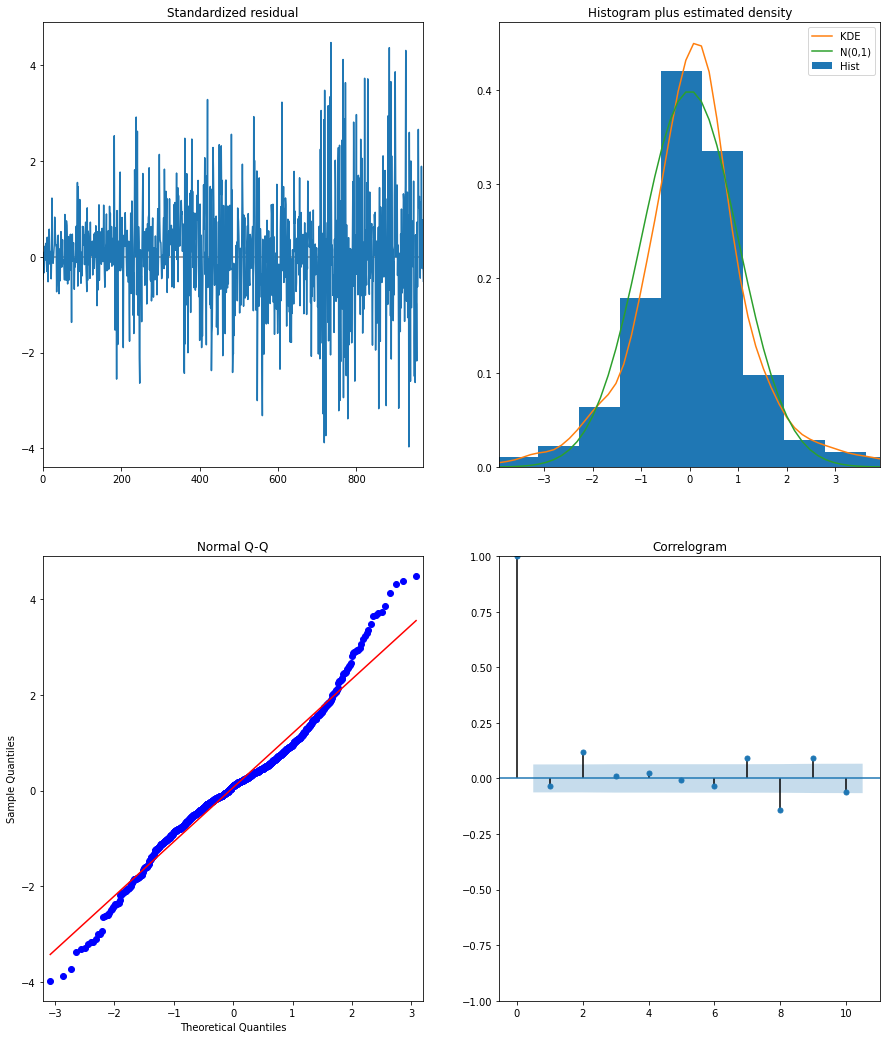

In [121]:
hist_type = sarima_col_1 #hist_type = 'Adj Close'
hist_params= output_df[output_df['hist']==hist_type]
hist_params.pdq.values[0]
hist_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(sarima_df[hist_type],order=hist_params.pdq.values[0], seasonal_order= hist_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 

pred = output_sarima.get_prediction(start=pd.to_datetime('2020-01-10'), dynamic=False)
pred_conf = pred.conf_int()

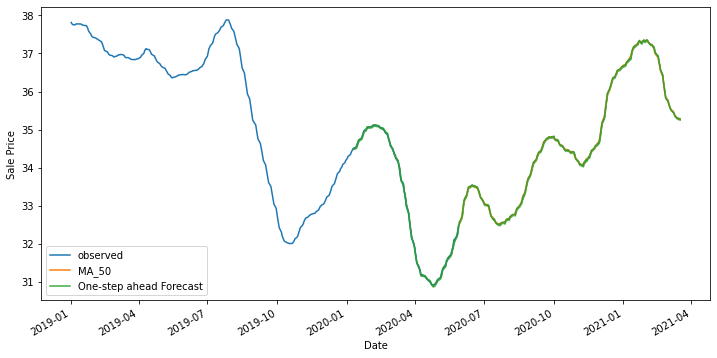

In [122]:
plt.figure(figsize=(12,6))
# Plot observed values

#ax = train['Adj Close']['2019':].plot(label='observed')
ax = train[sarima_col_1]['2019':].plot(label='observed')#
#test['Adj Close']['2019':].plot()#label='Test'
test[sarima_col_1]['2019':].plot()#label='Test'
# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Sale Price')
plt.legend()

In [123]:
# Get the real and predicted values
forecast = pred.predicted_mean
actual =test[sarima_col_1]['1996':] #actual =test['Adj Close']['1996':]

# Compute the root mean square error
mse = ((forecast - actual) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#np.sqrt(np.mean((predictions-targets)**2))
rmse = np.sqrt(np.mean((forecast - actual) ** 2))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 0.0
The Root Mean Squared Error of our forecasts is 0.02


/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                   MA_50   No. Observations:                 1009
Model:             SARIMAX(2, 0, 0)x(0, 1, [1, 2], 12)   Log Likelihood                2733.089
Date:                                 Wed, 17 Mar 2021   AIC                          -5456.178
Time:                                         15:38:15   BIC                          -5431.782
Sample:                                              0   HQIC                         -5446.893
                                                - 1009                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9688      0.005    398.617      0.000       1.959       1.978
ar.L2         -0.9710      0.005   -196.220      0.000      -0.981      -0.961
ma.S.L12      54.8847    3.3e-06   1.66e+07      0.000      54.885      54.885
ma.S.L24     -38.2899   4.95e-06  -7.73e+06      0.000     -38.290     -38.290
sigma2      5.142e-08   1.32e-09     38.855      0.000    4.88e-08     5.4e-08
===================================================================================
Ljung-Box (Q):                      149.38   Jarque-Bera (JB):               133.65
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.35   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.02e+23. Standard errors may be unstable.
"""



MODEL DIAGNOSTICS


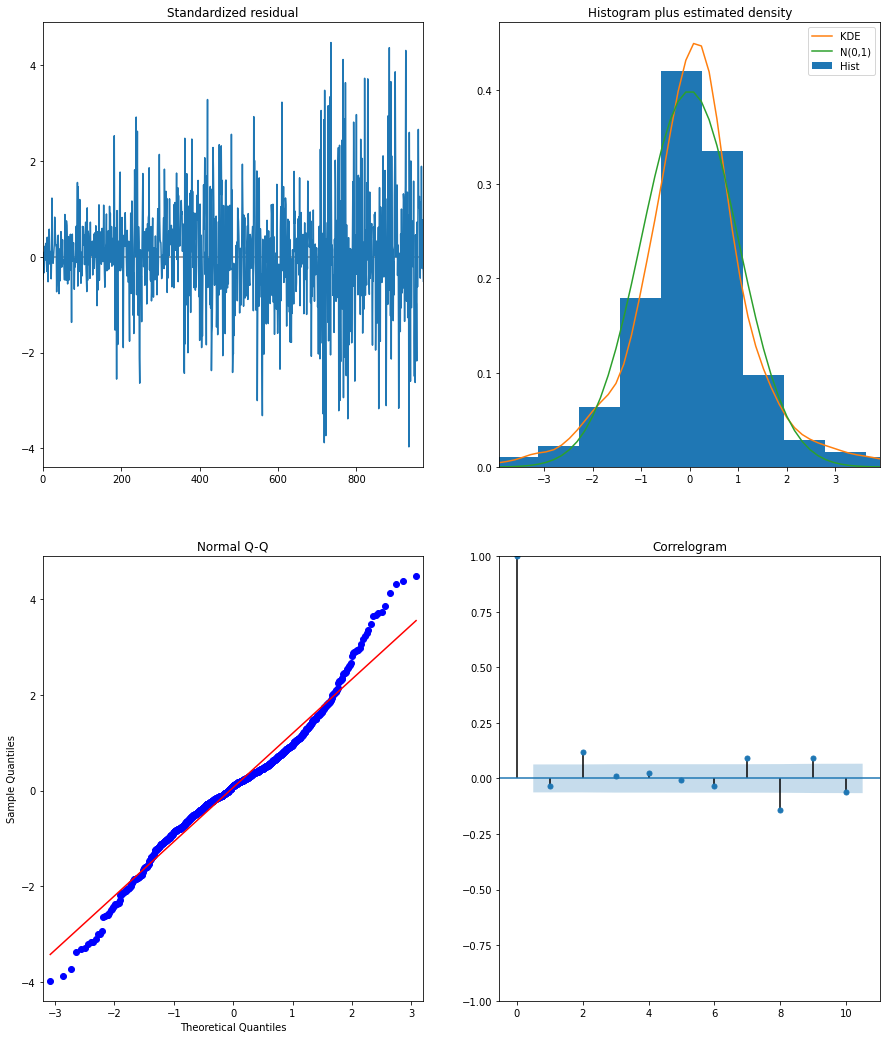

In [124]:
history_type = sarima_col_1 #history_type = 'Adj Close'
zip_params = output_df[output_df['hist']==history_type]
zip_params.pdq.values[0]
zip_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(sarima_df[history_type],order=zip_params.pdq.values[0] ,seasonal_order= zip_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output_sarima.get_prediction(start=pd.to_datetime('2020-01-10'), dynamic=True,full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

In [125]:
def prediction_vis(pred_dynamic,pred_dynamic_conf, y):
  # Plot the dynamic forecast with confidence intervals.
  plt.figure(figsize=(12,5))
  # Plot observed values
  ax = y.plot(label='Observed')

  # Plot predicted values
  pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic Forecast', alpha=0.9)

  # Plot the range for confidence intervals
  ax.fill_between(pred_dynamic_conf.index,
                  pred_dynamic_conf.iloc[:, 0],
                  pred_dynamic_conf.iloc[:, 1], color='g', alpha=0.5)

  # Set axes labels
  ax.set_xlabel('Date')
  ax.set_ylabel('Sale Price')
  plt.legend()

  return ax

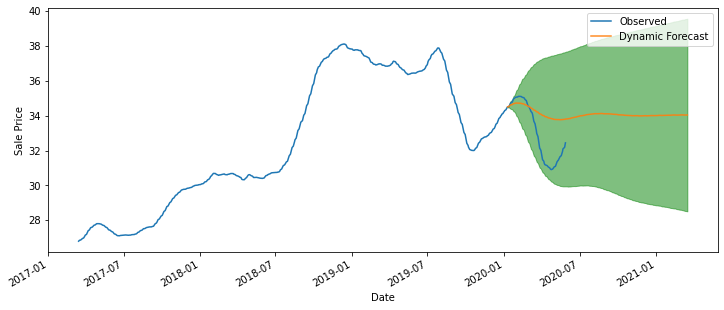

In [126]:
prediction_visual = prediction_vis(pred_dynamic,pred_dynamic_conf,train[history_type])
prediction_visual

In [127]:
# # Get the real and predicted values
# forecast_11238 = pred_dynamic.predicted_mean
# truth_11238 = train[current_zip]#['1996':]

# # Compute the mean square error
# mse = ((forecast_11238 - truth_11238) ** 2).mean()
# print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
# #np.sqrt(np.mean((predictions-targets)**2))
# rmse = np.sqrt(np.mean((forecast_11238 - truth_11238) ** 2))
# print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

In [128]:
# Get the real and predicted values
forecast = pred_dynamic.predicted_mean
actual = train[history_type]#['1996':]

# Compute the mean square error
mse = ((forecast - actual) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#np.sqrt(np.mean((predictions-targets)**2))
rmse = np.sqrt(np.mean((forecast - actual) ** 2))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 2.93
The Root Mean Squared Error of our forecasts is 1.71


### LTSM / Multi-Stocks


In [129]:
multi_stocks

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
Date,,,,,,
2017-01-03,26.653324,103.436539,25.400000,NaN,23.433638,NaN
2017-01-04,26.887548,103.266876,26.200001,NaN,23.619688,NaN
2017-01-05,27.146002,104.347321,26.400000,NaN,24.262403,NaN
2017-01-06,27.041008,103.847282,27.400000,NaN,24.042524,NaN
2017-01-09,27.032928,103.829422,28.400000,NaN,24.127094,NaN
...,...,...,...,...,...,...
2021-03-11,34.709999,159.139999,187.630005,140.470001,48.669998,102.599998
2021-03-12,34.939999,159.600006,202.770004,136.990005,48.419998,103.279999
2021-03-15,35.410000,160.419998,217.460007,143.660004,48.770000,107.879997


In [130]:
def delta_time_series(data,col=None):
#     data['Actual_Changes'] = data['Close'] - data['Close'].shift(1)
#     data['Percent_Chg'] = data[col].pct_change(1)
#     data['MA_50'] = data[col].rolling(50).mean()
    data = data.dropna()
    return data

In [131]:
multi = delta_time_series(multi_stocks, col='Adj Close')
multi

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
Date,,,,,,
2019-10-10,31.963688,124.006470,4.480000,14.160000,41.586590,14.240000
2019-10-11,32.249474,126.187592,4.560000,14.055000,41.567513,13.820000
2019-10-14,32.419167,125.601471,4.690000,13.930000,41.815510,12.750000
2019-10-15,32.597778,127.638466,4.830000,14.330000,42.168419,12.920000
2019-10-16,32.454887,129.877228,4.740000,14.150000,41.767818,12.940000
...,...,...,...,...,...,...
2021-03-11,34.709999,159.139999,187.630005,140.470001,48.669998,102.599998
2021-03-12,34.939999,159.600006,202.770004,136.990005,48.419998,103.279999
2021-03-15,35.410000,160.419998,217.460007,143.660004,48.770000,107.879997


In [132]:
multi.shape

(361, 6)

In [133]:
def plot_delta(data,col=None,symbol=None):
    #plt.figure(figsize=(12,6))
    #plt.plot(delta_time_series(data))
    data.plot(figsize=(12,6))
    label_font = {'weight':'bold','size':18}
    plt.title('Daily Percentage Price Change',fontdict=label_font)
    plt.xlabel('Dates',fontdict=label_font)
    plt.ylabel('close')
    plt.show()

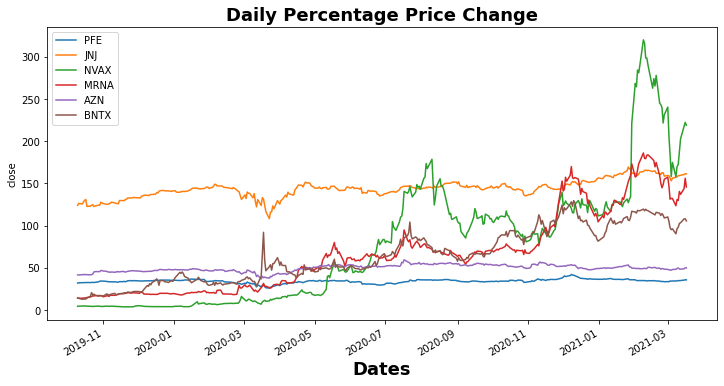

In [134]:
#simple daily return
#centered aroun d 0
plot_delta(multi)

In [135]:
def get_y_from_df(train_scaled_df, look_back, col='PFE', ):
    y = train_scaled_df[col].iloc[look_back: ]
    return y

#### Train Test Split

In [136]:
train_size = int(len(multi) * 0.80)#0.67
test_size = len(multi) - train_size

In [137]:
multi.index[train_size]

Timestamp('2020-12-01 00:00:00')

In [138]:
multi.index[-test_size]


Timestamp('2020-12-01 00:00:00')

In [139]:
def train_test_val(single_stock, date1='2020-09-11', date2='2020-11-01'):    
    train = single_stock[:date1]#'2020-09-11'
    val = single_stock[date1:date2]
    test = single_stock[date2:] #2021-02-12
    ax = train.plot(figsize=(12,8))
    val.plot(ax=ax)
    test.plot(ax=ax)
    
    return train, val, test

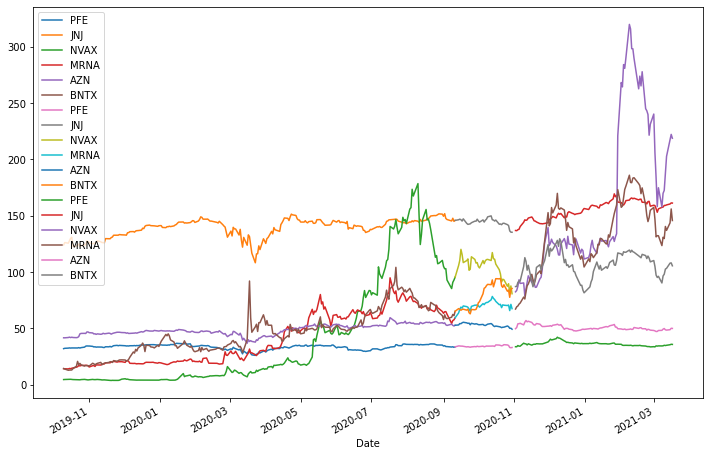

In [140]:
train, val, test= train_test_val(multi)

#### Normalize Data

In [141]:
def scale_function(train, test,val):
# normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)
    val_scaled = scaler.transform(val)
    
    return scaler, train_scaled,test_scaled, val_scaled

In [142]:
scaler, train_scaled, test_scaled, val_scaled = scale_function(train,test,val)

In [143]:
train_scaled_df = pd.DataFrame(train_scaled, columns=train.columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=test.columns, index=test.index)
val_scaled_df = pd.DataFrame(val_scaled, columns=val.columns, index=val.index)

In [144]:
train_scaled_df.shape, val_scaled_df.shape, test_scaled_df.shape

((233, 6), (36, 6), (93, 6))

In [145]:
look_back = 3
batch_size=3
col_index = {v:k for k,v in enumerate(train_scaled_df.columns)}
col_index

{'PFE': 0, 'JNJ': 1, 'NVAX': 2, 'MRNA': 3, 'AZN': 4, 'BNTX': 5}

In [146]:
col_index['PFE']

0

#### Timeseries Generator

In [147]:
def generator_function(train_scaled_df, val_scaled_df, test_scaled_df, col=None):
    train_data_gen = TimeseriesGenerator(train_scaled_df.values, train_scaled_df[col].values,
                                   length=look_back, sampling_rate=1,stride=1,
                                   batch_size=batch_size)

    val_data_gen = TimeseriesGenerator(val_scaled_df.values, val_scaled_df[col].values,
                                   length=look_back, sampling_rate=1,stride=1,
                                   batch_size=batch_size)

    test_data_gen = TimeseriesGenerator(test_scaled_df.values, test_scaled_df[col].values,
                                   length=look_back, sampling_rate=1,stride=1,
                                   batch_size=3)
    
    ex_X, ex_y = train_data_gen[0]
    #ex_X.shape
    
    return train_data_gen,val_data_gen,test_data_gen, ex_X,ex_y

In [148]:
train_data_gen,val_data_gen,test_data_gen, ex_X,ex_y = generator_function(train_scaled_df, val_scaled_df,
                                                               test_scaled_df, col='PFE')

In [149]:
# ex_X, ex_y = train_data_gen[0]
# ex_X.shape

In [150]:
sample = ex_X[0]
sample.shape

(3, 6)

In [151]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=sample.shape))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 25))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.summary()    

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 50)             11400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 50)             20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)               

In [152]:
early_stop = EarlyStopping(monitor='val_loss', patience=3,verbose=True)
# hist = model.fit(X_train,y_train, epochs=10,batch_size=32,callbacks=[early_stop],validation_split=0.1)     
hist = model.fit_generator(train_data_gen, epochs=25,validation_data=val_data_gen,callbacks=[early_stop])

Epoch 1/25
77/77 [==============================] - 1s 9ms/step - loss: 0.0936 - val_loss: 0.0133
Epoch 2/25
77/77 [==============================] - 1s 9ms/step - loss: 0.0310 - val_loss: 8.0103e-04
Epoch 3/25
77/77 [==============================] - 1s 8ms/step - loss: 0.0198 - val_loss: 0.0031
Epoch 4/25
77/77 [==============================] - 1s 10ms/step - loss: 0.0172 - val_loss: 0.0109
Epoch 5/25
77/77 [==============================] - 1s 10ms/step - loss: 0.0133 - val_loss: 0.0244
Epoch 00005: early stopping


In [153]:
model.evaluate_generator(test_data_gen)

0.019614681601524353

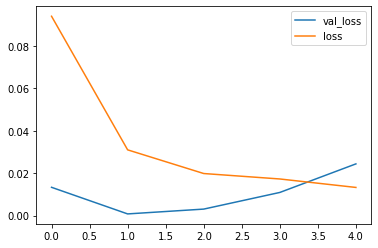

In [154]:
pd.DataFrame(hist.history).plot()

In [155]:
def save_model(model):
    model.save('model_parameters')
    model_params = keras.models.load_model('model_parameters')
    model_params.summary()

    return model_params

In [156]:
# model_params = save_model(model)

In [157]:
trainPredict = model.predict_generator(train_data_gen)
trainPredict.shape

(230, 1)

In [158]:
testPredict = model.predict_generator(test_data_gen)
testPredict.shape

(90, 1)

In [159]:
y_hat_train = pd.Series(trainPredict.flatten(),index=train.index[look_back:])
len(y_hat_train)

230

In [160]:
#y_hat_train = pd.Series(testPredict.
y_hat_test = pd.Series(testPredict.flatten(),index=test.index[look_back:])
len(y_hat_test)

90

In [161]:
y_train = get_y_from_df(train_scaled_df,look_back)
y_test = get_y_from_df(test_scaled_df,look_back)
y_train = get_y_from_df(train_scaled_df,look_back)
y_val = get_y_from_df(val_scaled_df,look_back)

#### RMSE Function

In [162]:
def model_metrics(y_train,y_hat_train):
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_hat_train))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(y_test, y_hat_test))
    print('Test Score: %.2f RMSE' % (testScore))
    
    return trainScore, testScore

In [163]:
#a value of 0 means predcitions were exact
#models got values exactly as they were supposed to from testing data
#what in normalized
model_metrics(y_train,y_hat_train)

Train Score: 0.09 RMSE
Test Score: 0.12 RMSE


(0.08874193521238218, 0.1210655396663821)

#### Prediction Plot

In [164]:
#red what th model actually predicted
def prediction_plot(y_train,y_test,y_val,y_hat_test):
    plt.figure(figsize=(12,6))
    y_train.plot(label='train')
    y_test.plot(label='test')
    y_val.plot(label='val')
    y_hat_test.plot(label='Prediction')
    #lt.legend(['Valid','Train','Predictions'],loc='uppper left')
    plt.legend()
    

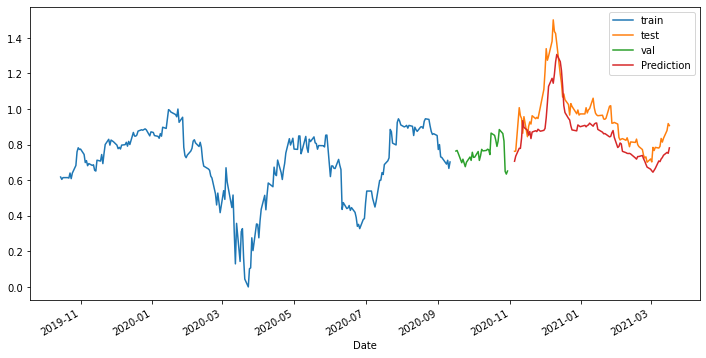

In [165]:
prediction_plot(y_train,y_test,y_val,y_hat_test)

### LTSM / Single Stock

In [166]:
#df_single.to_csv('single_stock')

# single = pd.read_csv('single_stock', parse_dates=True, index_col='Date')
# single

In [167]:
# pfe_stock_data
pfe_stock_data

,Close,Volume,Adj Close
Date,,,
2017-01-03,31.309298,23391844.0,26.653324
2017-01-04,31.584440,22753963.0,26.887548
2017-01-05,31.888046,21083584.0,27.146002
2017-01-06,31.764706,18418228.0,27.041008
2017-01-09,31.755219,21559886.0,27.032928
...,...,...,...
2021-03-11,34.709999,24511100.0,34.709999
2021-03-12,34.939999,16328500.0,34.939999
2021-03-15,35.410000,21896100.0,35.410000


In [168]:
def delta_time_series1(data,col=None):
    data['Actual_Changes'] = data['Close'] - data['Close'].shift(1)
    data['Percent_Chg'] = data[col].pct_change(1)
    data['MA_50'] = data[col].rolling(50).mean()
    data = data.dropna()
    return data

In [169]:
single = delta_time_series1(pfe_stock_data, col='Adj Close')
single

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,Volume,Adj Close,Actual_Changes,Percent_Chg,MA_50
Date,,,,,,
2017-03-15,32.855785,24279839.0,28.254789,0.388992,0.011981,26.801835
2017-03-16,32.666035,21816219.0,28.091606,-0.189751,-0.005775,26.830601
2017-03-17,32.561668,45736117.0,28.001856,-0.104366,-0.003195,26.852887
2017-03-20,32.618595,18435514.0,28.050808,0.056927,0.001748,26.870983
2017-03-21,32.495255,33083479.0,27.944742,-0.123341,-0.003781,26.889058
...,...,...,...,...,...,...
2021-03-11,34.709999,24511100.0,34.709999,-0.220001,-0.006298,35.347557
2021-03-12,34.939999,16328500.0,34.939999,0.230000,0.006626,35.313331
2021-03-15,35.410000,21896100.0,35.410000,0.470001,0.013452,35.294639


In [170]:
def get_y_from_df(train_scaled_df, look_back, col='Adj Close', ):
    y = train_scaled_df[col].iloc[look_back: ]
    return y

In [171]:
train_size = int(len(single) * 0.80)#0.67
test_size = len(single) - train_size

In [172]:
def train_test_val(single_stock, date1='2020-09-11', date2='2020-11-01'):    
    train = single_stock[:date1]#'2020-09-11'
    val = single_stock[date1:date2]
    test = single_stock[date2:] #2021-02-12
    ax = train.plot()
    val.plot(ax=ax)
    test.plot(ax=ax)
    
    return train, val, test

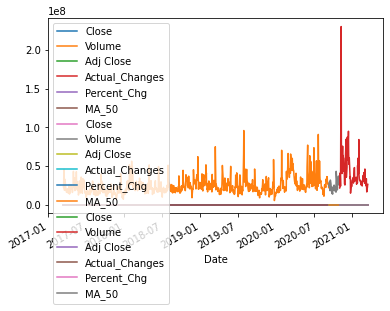

In [173]:
train, val, test= train_test_val(single)

In [174]:
def scale_function(train, test,val):
# normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)
    val_scaled = scaler.transform(val)
    
    return scaler, train_scaled,test_scaled, val_scaled

In [175]:
scaler, train_scaled, test_scaled, val_scaled = scale_function(train,test,val)

In [176]:
train_scaled_df = pd.DataFrame(train_scaled, columns=train.columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=test.columns, index=test.index)
val_scaled_df = pd.DataFrame(val_scaled, columns=val.columns, index=val.index)

In [177]:
train_scaled_df.shape, val_scaled_df.shape, test_scaled_df.shape

((881, 6), (36, 6), (93, 6))

In [178]:
look_back = 3
batch_size=3
col_index = {v:k for k,v in enumerate(train_scaled_df.columns)}
col_index

{'Close': 0,
 'Volume': 1,
 'Adj Close': 2,
 'Actual_Changes': 3,
 'Percent_Chg': 4,
 'MA_50': 5}

In [179]:
def generator_function(train_scaled_df, val_scaled_df, test_scaled_df, col=None):
    train_data_gen = TimeseriesGenerator(train_scaled_df.values, train_scaled_df[col].values,
                                   length=look_back, sampling_rate=1,stride=1,
                                   batch_size=batch_size)

    val_data_gen = TimeseriesGenerator(val_scaled_df.values, val_scaled_df[col].values,
                                   length=look_back, sampling_rate=1,stride=1,
                                   batch_size=batch_size)

    test_data_gen = TimeseriesGenerator(test_scaled_df.values, test_scaled_df[col].values,
                                   length=look_back, sampling_rate=1,stride=1,
                                   batch_size=3)
    
    ex_X, ex_y = train_data_gen[0]
    #ex_X.shape
    
    return train_data_gen,val_data_gen,test_data_gen, ex_X,ex_y

In [180]:
train_data_gen,val_data_gen,test_data_gen, ex_X,ex_y = generator_function(train_scaled_df, val_scaled_df,
                                                               test_scaled_df, col='Adj Close')

In [181]:
sample = ex_X[0]
sample.shape

(3, 6)

In [182]:
model1 = Sequential()

model1.add(LSTM(units = 50, return_sequences = True, input_shape=sample.shape))
model1.add(Dropout(0.2))

model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))

model1.add(LSTM(units = 50, return_sequences = False))
model1.add(Dropout(0.2))

model1.add(Dense(units = 25,activation='relu'))
model1.add(Dense(units = 1))

model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

model1.summary()    

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 3, 50)             11400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 3, 50)             20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)               

In [183]:
early_stop = EarlyStopping(monitor='val_loss', patience=3,verbose=True)
# hist = model.fit(X_train,y_train, epochs=10,batch_size=32,callbacks=[early_stop],validation_split=0.1)     
hist = model1.fit_generator(train_data_gen, epochs=25,validation_data=val_data_gen,callbacks=[early_stop])

Epoch 1/25
293/293 [==============================] - 4s 12ms/step - loss: 0.0254 - val_loss: 0.0041
Epoch 2/25
293/293 [==============================] - 4s 13ms/step - loss: 0.0089 - val_loss: 6.1502e-04
Epoch 3/25
293/293 [==============================] - 4s 12ms/step - loss: 0.0062 - val_loss: 0.0141
Epoch 4/25
293/293 [==============================] - 4s 13ms/step - loss: 0.0057 - val_loss: 0.0128
Epoch 5/25
293/293 [==============================] - 4s 13ms/step - loss: 0.0046 - val_loss: 0.0093
Epoch 00005: early stopping


In [184]:
model1.evaluate_generator(test_data_gen)

0.005592856556177139

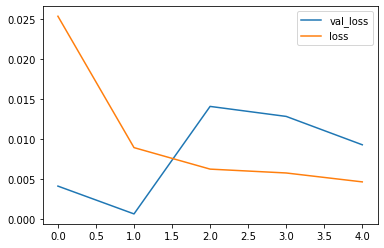

In [185]:
pd.DataFrame(hist.history).plot()

In [186]:
trainPredict = model1.predict_generator(train_data_gen)
trainPredict.shape

(878, 1)

In [187]:
testPredict = model1.predict_generator(test_data_gen)
testPredict.shape

(90, 1)

In [188]:
y_hat_train = pd.Series(trainPredict.flatten(),index=train.index[look_back:])
len(y_hat_train)

878

In [189]:
#y_hat_train = pd.Series(testPredict.
y_hat_test = pd.Series(testPredict.flatten(),index=test.index[look_back:])
len(y_hat_test)

90

In [190]:
y_train = get_y_from_df(train_scaled_df,look_back)
y_test = get_y_from_df(test_scaled_df,look_back)
y_train = get_y_from_df(train_scaled_df,look_back)
y_val = get_y_from_df(val_scaled_df,look_back)

In [191]:
def model_metrics(y_train,y_hat_train):
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_hat_train))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(y_test, y_hat_test))
    print('Test Score: %.2f RMSE' % (testScore))
    
    return trainScore, testScore

In [192]:
#what in normalized
model_metrics(y_train,y_hat_train)

Train Score: 0.05 RMSE
Test Score: 0.09 RMSE


(0.0477674020263131, 0.08800967080175136)

In [193]:
def prediction_plot(y_train,y_test,y_val,y_hat_test):
    plt.figure(figsize=(12,6))
    y_train.plot(label='train')
    y_test.plot(label='test')
    y_val.plot(label='val')
    y_hat_test.plot(label='Prediction')
    #lt.legend(['Valid','Train','Predictions'],loc='uppper left')
    plt.legend()
    

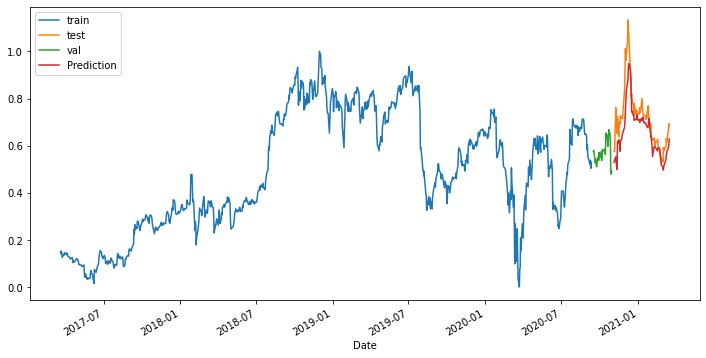

In [194]:
prediction_plot(y_train,y_test,y_val,y_hat_test)

### LTSM and Technical Indicators

#### Percent_Chg

In [195]:
#train_scaled_df.columns

#single

In [196]:
col_index['MA_50']

5

In [197]:
train_data_gen,val_data_gen,test_data_gen, ex_X,ex_y = generator_function(train_scaled_df, val_scaled_df,
                                                               test_scaled_df, col='MA_50')

In [198]:
sample = ex_X[0]
sample.shape

(3, 6)

In [199]:
model2 = Sequential()

model2.add(LSTM(units = 50, return_sequences = True, input_shape=sample.shape))
model2.add(Dropout(0.2))

model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))

model2.add(LSTM(units = 50, return_sequences = False))
model2.add(Dropout(0.2))

model2.add(Dense(units = 25))
model2.add(Dense(units = 1))

model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

model2.summary()    

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 3, 50)             11400     
_________________________________________________________________
dropout_7 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 3, 50)             20200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 25)               

In [200]:
early_stop = EarlyStopping(monitor='val_loss', patience=3,verbose=True)
# hist = model.fit(X_train,y_train, epochs=10,batch_size=32,callbacks=[early_stop],validation_split=0.1)     
hist = model2.fit_generator(train_data_gen, epochs=50,validation_data=val_data_gen,callbacks=[early_stop])

Epoch 1/50
293/293 [==============================] - 2s 7ms/step - loss: 0.0280 - val_loss: 0.0106
Epoch 2/50
293/293 [==============================] - 2s 8ms/step - loss: 0.0058 - val_loss: 4.4447e-04
Epoch 3/50
293/293 [==============================] - 2s 8ms/step - loss: 0.0031 - val_loss: 9.8211e-04
Epoch 4/50
293/293 [==============================] - 2s 7ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 5/50
293/293 [==============================] - 2s 8ms/step - loss: 0.0025 - val_loss: 0.0035
Epoch 00005: early stopping


In [201]:
model2.evaluate_generator(test_data_gen)

0.0017894721822813153

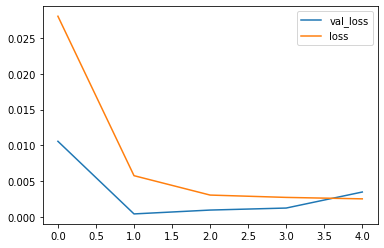

In [202]:
pd.DataFrame(hist.history).plot()

In [203]:
def get_y_from_df(train_scaled_df, look_back, col='MA_50'):
    y = train_scaled_df[col].iloc[look_back: ]
    return y

In [204]:
#look_back=3

In [205]:
trainPredict = model2.predict_generator(train_data_gen)
#trainPredict.shape
testPredict = model2.predict_generator(test_data_gen)
#testPredict.shape
y_hat_train = pd.Series(trainPredict.flatten(),index=train_scaled_df.index[look_back:])
y_hat_test = pd.Series(testPredict.flatten(),index=test_scaled_df.index[look_back:])

y_train = get_y_from_df(train_scaled_df,look_back)
y_test = get_y_from_df(test_scaled_df,look_back)
y_train = get_y_from_df(train_scaled_df,look_back)
y_val = get_y_from_df(val_scaled_df,look_back)

In [206]:
model_metrics(y_train,y_hat_train)

Train Score: 0.03 RMSE
Test Score: 0.04 RMSE


(0.0329167718119936, 0.04012240787201737)

In [207]:
model_metrics(y_test,y_hat_test)

Train Score: 0.04 RMSE
Test Score: 0.04 RMSE


(0.04012240787201737, 0.04012240787201737)

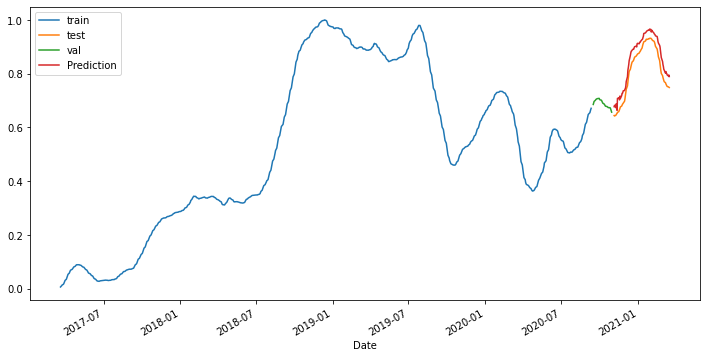

In [208]:
# plt.figure(figsize=(12,6))
# y_train.plot(label='train')
# y_test.plot(label='test')
# y_val.plot(label='val')
# y_hat_test.plot(label='Prediction')
# #lt.legend(['Valid','Train','Predictions'],loc='uppper left')
# plt.legend()
prediction_plot(y_train,y_test,y_val,y_hat_test)

### Actual_change

In [209]:
train_data_gen,val_data_gen,test_data_gen, ex_X,ex_y = generator_function(train_scaled_df, val_scaled_df,
                                                               test_scaled_df, col='Actual_Changes')

In [210]:
model3 = Sequential()

model3.add(LSTM(units = 50, return_sequences = True, input_shape=sample.shape))
model3.add(Dropout(0.2))

model3.add(LSTM(units = 50, return_sequences = True))
model3.add(Dropout(0.2))

model3.add(LSTM(units = 50, return_sequences = False))
model3.add(Dropout(0.2))

model3.add(Dense(units = 25, activation='relu'))
model3.add(Dense(units = 1))

model3.compile(optimizer = 'adam', loss = 'mean_squared_error')

model3.summary()    

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 3, 50)             11400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 3, 50)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 3, 50)             20200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 3, 50)             0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 25)               

In [211]:
hist = model3.fit_generator(train_data_gen, epochs=50,validation_data=val_data_gen,
                           callbacks=[early_stop])

Epoch 1/50
293/293 [==============================] - 2s 8ms/step - loss: 0.0244 - val_loss: 0.0497
Epoch 2/50
293/293 [==============================] - 2s 8ms/step - loss: 0.0111 - val_loss: 0.0484
Epoch 3/50
293/293 [==============================] - 2s 8ms/step - loss: 0.0108 - val_loss: 0.0422
Epoch 4/50
293/293 [==============================] - 3s 9ms/step - loss: 0.0105 - val_loss: 0.0465
Epoch 5/50
293/293 [==============================] - 3s 10ms/step - loss: 0.0104 - val_loss: 0.0445
Epoch 6/50
293/293 [==============================] - 5s 16ms/step - loss: 0.0103 - val_loss: 0.0414
Epoch 7/50
293/293 [==============================] - 2s 8ms/step - loss: 0.0101 - val_loss: 0.0466
Epoch 8/50
293/293 [==============================] - 3s 11ms/step - loss: 0.0102 - val_loss: 0.0470
Epoch 9/50
293/293 [==============================] - 3s 9ms/step - loss: 0.0100 - val_loss: 0.0469
Epoch 00009: early stopping


In [212]:
model3.evaluate_generator(test_data_gen)

0.0044991797767579556

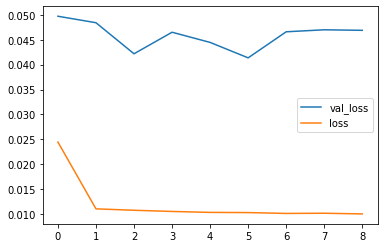

In [213]:
pd.DataFrame(hist.history).plot()

In [214]:
def get_y_from_df(train_scaled_df, look_back, col='Actual_Changes'):
    y = train_scaled_df[col].iloc[look_back: ]
    return y

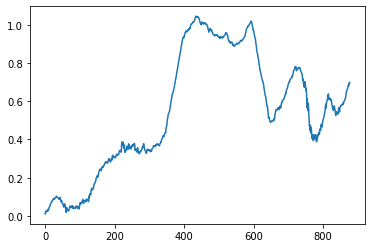

In [215]:
plt.plot(trainPredict)

In [216]:
trainPredict = model3.predict_generator(train_data_gen)
#trainPredict.shape
testPredict = model3.predict_generator(test_data_gen)
#testPredict.shape
y_hat_train = pd.Series(trainPredict.flatten(),index=train_scaled_df.index[look_back:])
y_hat_test = pd.Series(testPredict.flatten(),index=test_scaled_df.index[look_back:])

y_train = get_y_from_df(train_scaled_df,look_back)
y_test = get_y_from_df(test_scaled_df,look_back)
y_train = get_y_from_df(train_scaled_df,look_back)
y_val = get_y_from_df(val_scaled_df,look_back)

In [217]:
model_metrics(y_train,y_hat_train)

Train Score: 0.10 RMSE
Test Score: 0.12 RMSE


(0.09826608123089083, 0.11776742158065956)

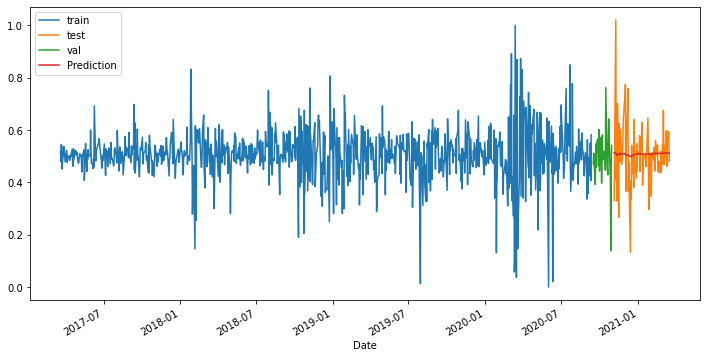

In [218]:
prediction_plot(y_train,y_test,y_val,y_hat_test)

In [219]:
print('Testing 2-26-21')

Testing 2-26-21
